**STEP 1: Imports and Reading Data**

In [278]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
#import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#plt.style.use('ggplot')
#pd.set_option('max_columns',200) # Setting the columns to 200 so that we can see them all

In [279]:
df=pd.read_csv(r"D:\IIT_MADRAS\CAPSTONE_PROJECT\FINAL_WALMART_PROJECT\Walmart DataSet.csv")

**STEP2: Data Understanding**  
* Dataframe shape  
* head and tail
* Columns list  
* dtypes  
* describe     


In [280]:
df.shape

(6435, 8)

In [281]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [282]:
list(df.columns)

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

In [283]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [284]:
df.describe().T

count          mean            std         min         25%  \
Store         6435.0  2.300000e+01      12.988182       1.000      12.000   
Weekly_Sales  6435.0  1.046965e+06  564366.622054  209986.250  553350.105   
Holiday_Flag  6435.0  6.993007e-02       0.255049       0.000       0.000   
Temperature   6435.0  6.066378e+01      18.444933      -2.060      47.460   
Fuel_Price    6435.0  3.358607e+00       0.459020       2.472       2.933   
CPI           6435.0  1.715784e+02      39.356712     126.064     131.735   
Unemployment  6435.0  7.999151e+00       1.875885       3.879       6.891   

                        50%           75%           max  
Store             23.000000  3.400000e+01  4.500000e+01  
Weekly_Sales  960746.040000  1.420159e+06  3.818686e+06  
Holiday_Flag       0.000000  0.000000e+00  1.000000e+00  
Temperature       62.670000  7.494000e+01  1.001400e+02  
Fuel_Price         3.445000  3.735000e+00  4.468000e+00  
CPI              182.616521  2.127433e+02  2.272328e+02  
Unemployment       7.874000  8.622000e+00  1.431300e+01

**STEP 3: Data Preparation**  
* Changing the column datatype of object type to date
* Creating new columns or Renaming columns if any.
* Dropping irrelevant columns and rows  
* Identifying duplicated columns  
* Setting the index to Date column
  


In [285]:
#Keeping dayfirst=True since the date format is in dd-mm-yyyy
df['Date']=pd.to_datetime(df['Date'],dayfirst=True) #Forcing the "Date" column to datetime instead of an object. 
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [286]:
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year
df.head(20)

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1 2010-02-05    1643690.90             0        42.31       2.572   
1       1 2010-02-12    1641957.44             1        38.51       2.548   
2       1 2010-02-19    1611968.17             0        39.93       2.514   
3       1 2010-02-26    1409727.59             0        46.63       2.561   
4       1 2010-03-05    1554806.68             0        46.50       2.625   
5       1 2010-03-12    1439541.59             0        57.79       2.667   
6       1 2010-03-19    1472515.79             0        54.58       2.720   
7       1 2010-03-26    1404429.92             0        51.45       2.732   
8       1 2010-04-02    1594968.28             0        62.27       2.719   
9       1 2010-04-09    1545418.53             0        65.86       2.770   
10      1 2010-04-16    1466058.28             0        66.32       2.808   
11      1 2010-04-23    1391256.12             0        64.84       2.795   
12      1 2010-04-30    1425100.71             0        67.41       2.780   
13      1 2010-05-07    1603955.12             0        72.55       2.835   
14      1 2010-05-14    1494251.50             0        74.78       2.854   
15      1 2010-05-21    1399662.07             0        76.44       2.826   
16      1 2010-05-28    1432069.95             0        80.44       2.759   
17      1 2010-06-04    1615524.71             0        80.69       2.705   
18      1 2010-06-11    1542561.09             0        80.43       2.668   
19      1 2010-06-18    1503284.06             0        84.11       2.637   

           CPI  Unemployment  Month  Year  
0   211.096358         8.106      2  2010  
1   211.242170         8.106      2  2010  
2   211.289143         8.106      2  2010  
3   211.319643         8.106      2  2010  
4   211.350143         8.106      3  2010  
5   211.380643         8.106      3  2010  
6   211.215635         8.106      3  2010  
7   211.018042         8.106      3  2010  
8   210.820450         7.808      4  2010  
9   210.622857         7.808      4  2010  
10  210.488700         7.808      4  2010  
11  210.439123         7.808      4  2010  
12  210.389546         7.808      4  2010  
13  210.339968         7.808      5  2010  
14  210.337426         7.808      5  2010  
15  210.617093         7.808      5  2010  
16  210.896761         7.808      5  2010  
17  211.176428         7.808      6  2010  
18  211.456095         7.808      6  2010  
19  211.453772         7.808      6  2010

In [287]:
#Example of dropping column using drop command
#df.drop(["CPI"],axis=1,inplace=True)

#Example of dropping columns using subsetting
#df[['Store', #'Date', 
#    'Weekly_Sales', 'Holiday_Flag', 'Temperature',
#       'Fuel_Price', 'Unemployment']]

In [288]:
df.isna().sum() # checking for the null values in the dataset. If found we either drop or replace them.

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Month           0
Year            0
dtype: int64

In [289]:
df.loc[df.duplicated()]# Duplicated rows give where two rows are exactly the same. Duplicated by default will give the all the additional rows and ignore the first one.

Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment, Month, Year]
Index: []

In [290]:
df.duplicated().sum()

0

In [291]:
df.set_index(df["Date"],inplace=True)
df.drop("Date",axis=1,inplace=True) #Droppping the date  column
df.head(20)

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   
2010-03-12      1    1439541.59             0        57.79       2.667   
2010-03-19      1    1472515.79             0        54.58       2.720   
2010-03-26      1    1404429.92             0        51.45       2.732   
2010-04-02      1    1594968.28             0        62.27       2.719   
2010-04-09      1    1545418.53             0        65.86       2.770   
2010-04-16      1    1466058.28             0        66.32       2.808   
2010-04-23      1    1391256.12             0        64.84       2.795   
2010-04-30      1    1425100.71             0        67.41       2.780   
2010-05-07      1    1603955.12             0        72.55       2.835   
2010-05-14      1    1494251.50             0        74.78       2.854   
2010-05-21      1    1399662.07             0        76.44       2.826   
2010-05-28      1    1432069.95             0        80.44       2.759   
2010-06-04      1    1615524.71             0        80.69       2.705   
2010-06-11      1    1542561.09             0        80.43       2.668   
2010-06-18      1    1503284.06             0        84.11       2.637   

                   CPI  Unemployment  Month  Year  
Date                                               
2010-02-05  211.096358         8.106      2  2010  
2010-02-12  211.242170         8.106      2  2010  
2010-02-19  211.289143         8.106      2  2010  
2010-02-26  211.319643         8.106      2  2010  
2010-03-05  211.350143         8.106      3  2010  
2010-03-12  211.380643         8.106      3  2010  
2010-03-19  211.215635         8.106      3  2010  
2010-03-26  211.018042         8.106      3  2010  
2010-04-02  210.820450         7.808      4  2010  
2010-04-09  210.622857         7.808      4  2010  
2010-04-16  210.488700         7.808      4  2010  
2010-04-23  210.439123         7.808      4  2010  
2010-04-30  210.389546         7.808      4  2010  
2010-05-07  210.339968         7.808      5  2010  
2010-05-14  210.337426         7.808      5  2010  
2010-05-21  210.617093         7.808      5  2010  
2010-05-28  210.896761         7.808      5  2010  
2010-06-04  211.176428         7.808      6  2010  
2010-06-11  211.456095         7.808      6  2010  
2010-06-18  211.453772         7.808      6  2010

**STEP 3: Feature Understanding**    
* Plotting Feature Distributions
    * Histogram  
    * KDE
    * Boxplot

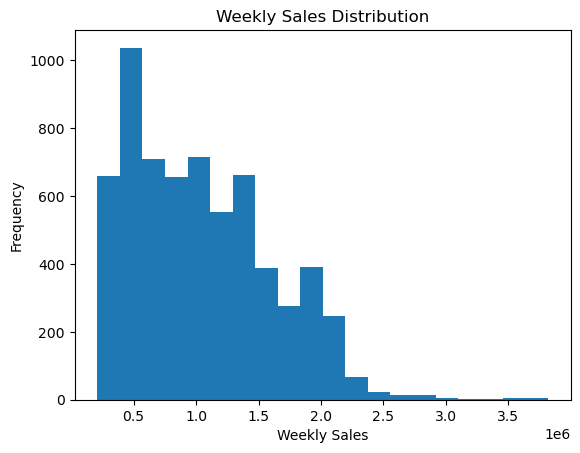

In [292]:
ax=df["Weekly_Sales"].plot(kind="hist",bins=20,title="Weekly Sales Distribution")
ax.set_xlabel("Weekly Sales")
plt.show()

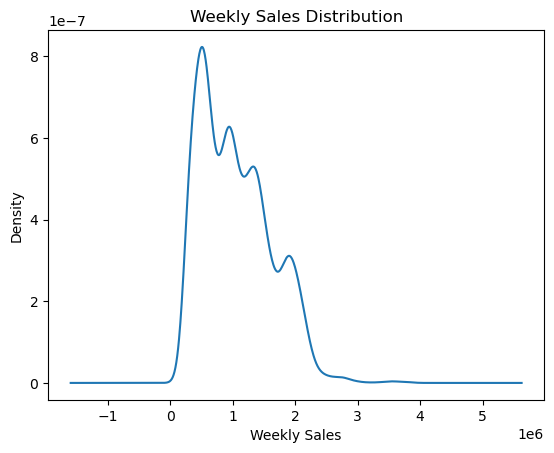

In [293]:
ax=df["Weekly_Sales"].plot(kind="kde",title="Weekly Sales Distribution")
ax.set_xlabel("Weekly Sales")
plt.show()

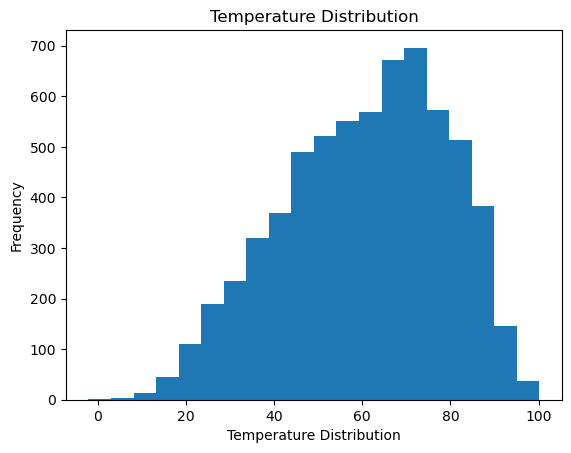

In [294]:
ax=df["Temperature"].plot(kind="hist",bins=20,title="Temperature Distribution")
ax.set_xlabel("Temperature Distribution")
plt.show()

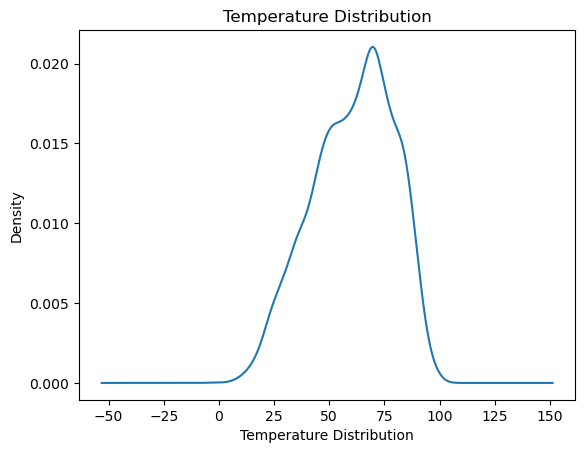

In [295]:
ax=df["Temperature"].plot(kind="kde",title="Temperature Distribution")
ax.set_xlabel("Temperature Distribution")
plt.show()

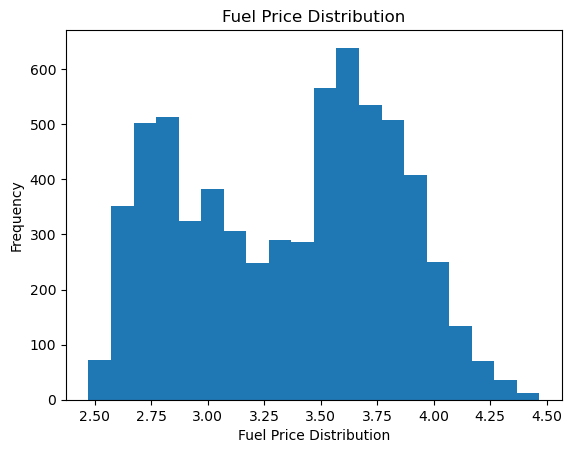

In [296]:
ax=df["Fuel_Price"].plot(kind="hist",bins=20,title="Fuel Price Distribution")
ax.set_xlabel("Fuel Price Distribution")
plt.show()

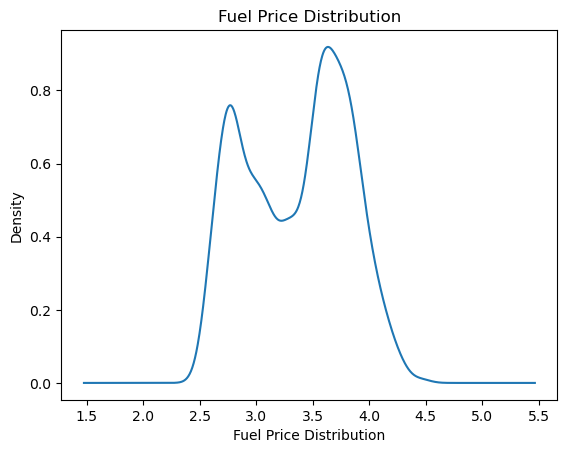

In [297]:
ax=df["Fuel_Price"].plot(kind="kde",title="Fuel Price Distribution")
ax.set_xlabel("Fuel Price Distribution")
plt.show()

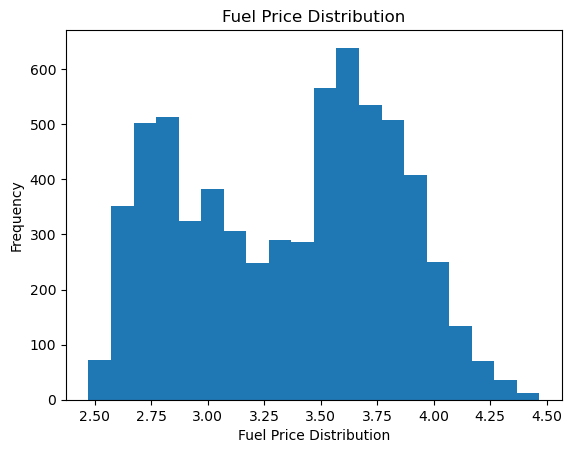

In [298]:
ax=df["Fuel_Price"].plot(kind="hist",bins=20,title="Fuel Price Distribution")
ax.set_xlabel("Fuel Price Distribution")
plt.show()

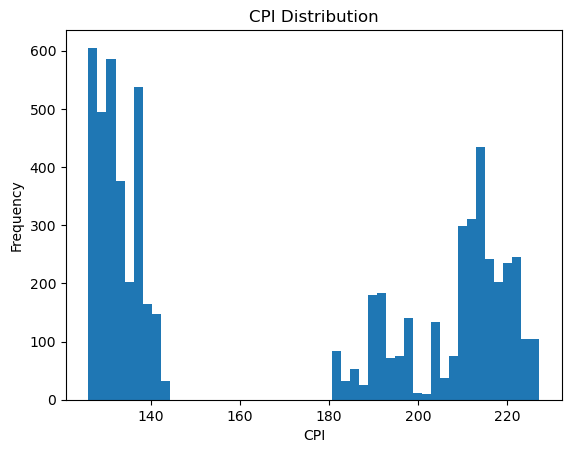

In [299]:
ax=df["CPI"].plot(kind="hist",bins=50,title="CPI Distribution")
ax.set_xlabel("CPI")
plt.show()

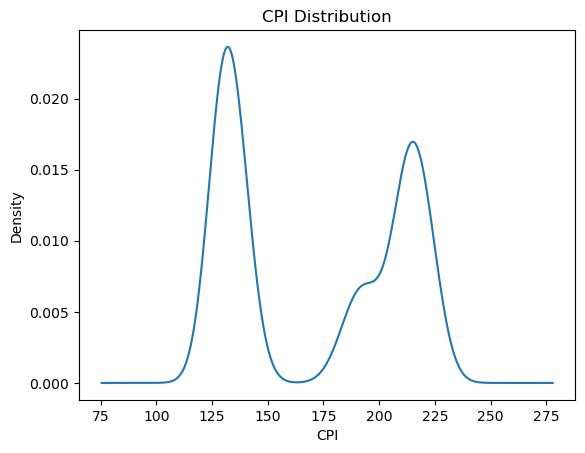

In [300]:
ax=df["CPI"].plot(kind="kde",title="CPI Distribution")
ax.set_xlabel("CPI")
plt.show()

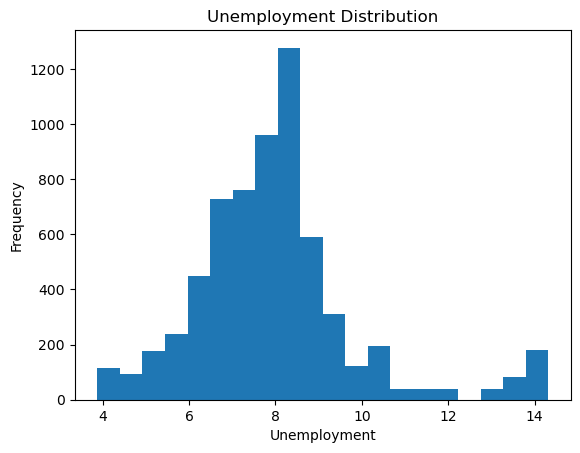

In [301]:
ax=df["Unemployment"].plot(kind="hist",bins=20,title="Unemployment Distribution")
ax.set_xlabel("Unemployment")
plt.show()

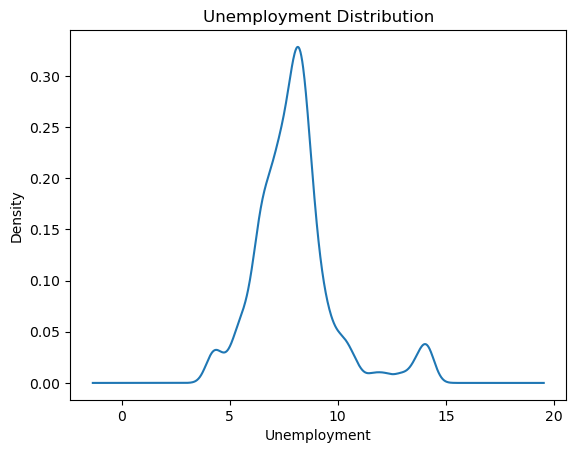

In [302]:
ax=df["Unemployment"].plot(kind="kde",title="Unemployment Distribution")
ax.set_xlabel("Unemployment")
plt.show()

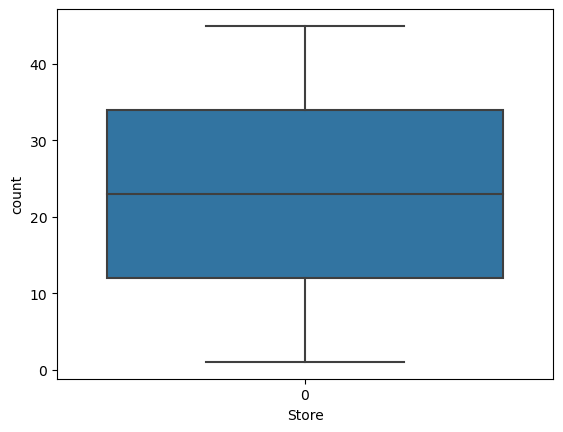

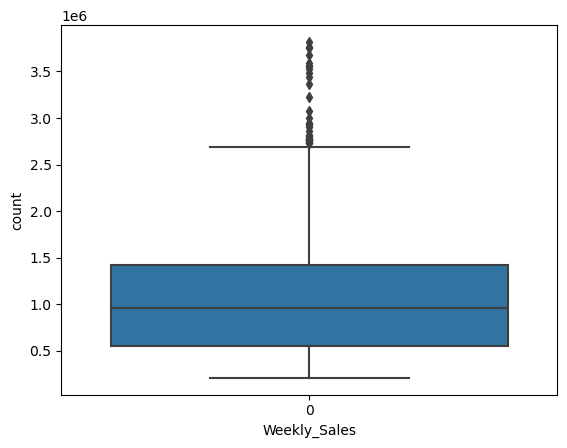

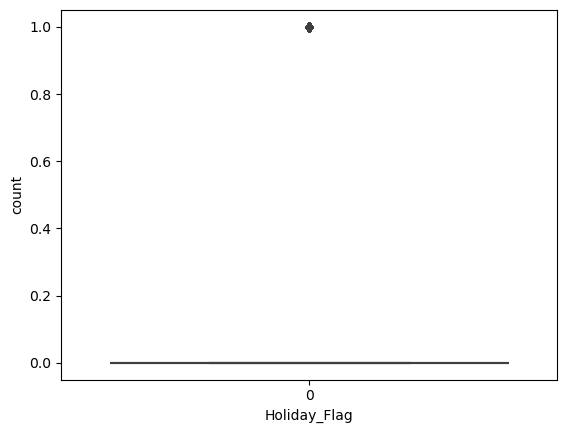

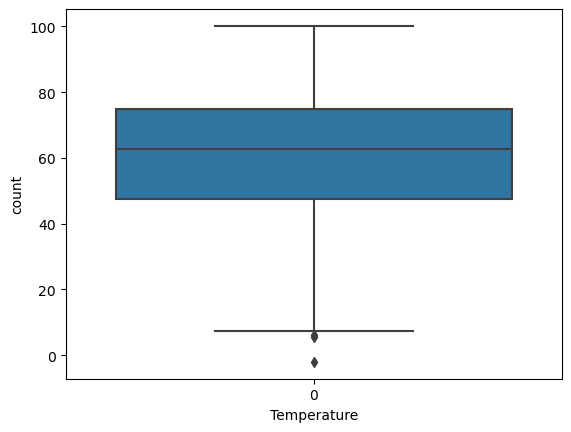

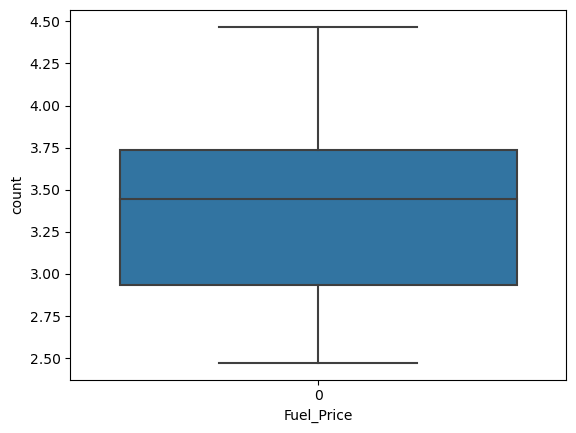

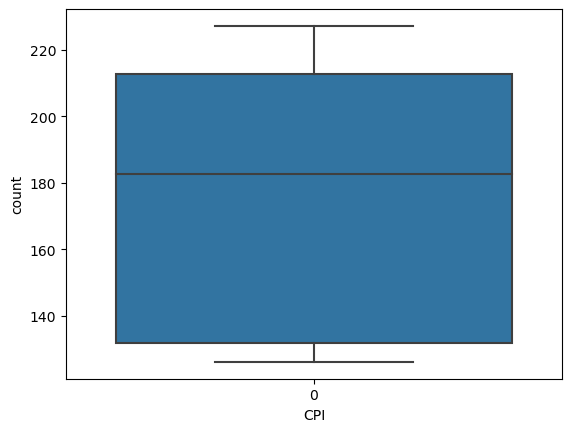

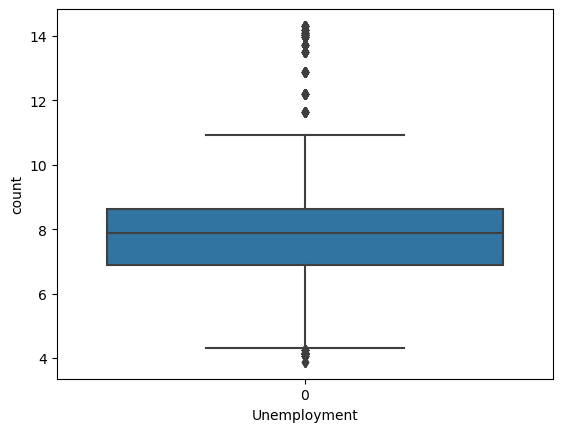

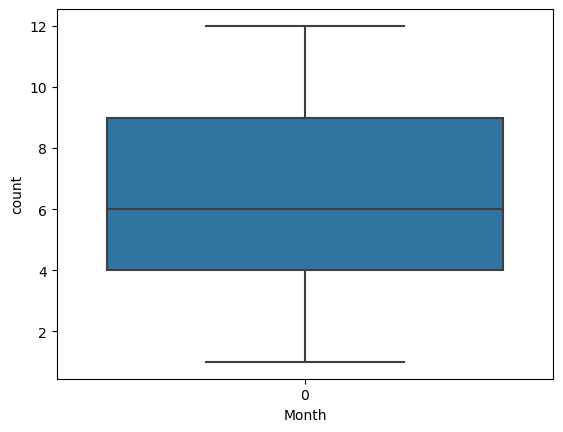

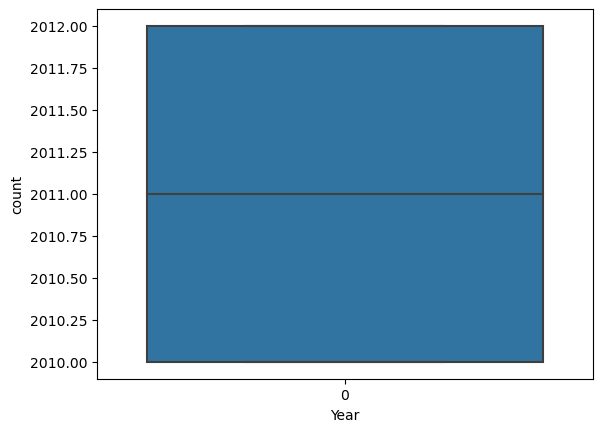

In [303]:
cols=list(df.columns)
for col_name in cols:
    if((df[col_name].dtypes=="int64") | (df[col_name].dtypes=="float64")):
        sns.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()
                  
        

**STEP 4 : Feature Relationship**  
* Scatterplot 
* Pairplot
* Heatmap Correlation




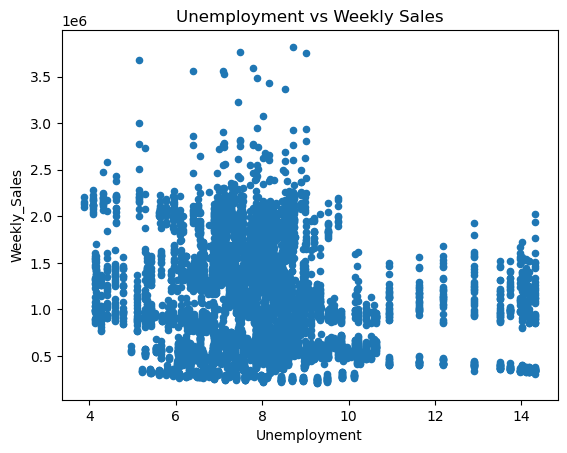

In [304]:
#Scatter plots are used to compare two features
df.plot(kind="scatter",x="Unemployment",y="Weekly_Sales",title="Unemployment vs Weekly Sales")
plt.show()

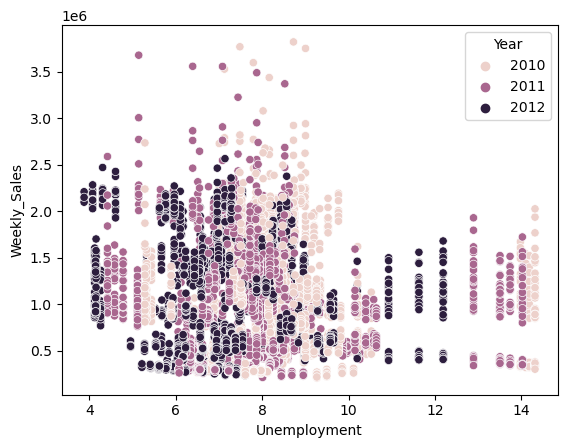

In [305]:
sns.scatterplot(data=df,x="Unemployment",y="Weekly_Sales",hue="Year")
plt.show()

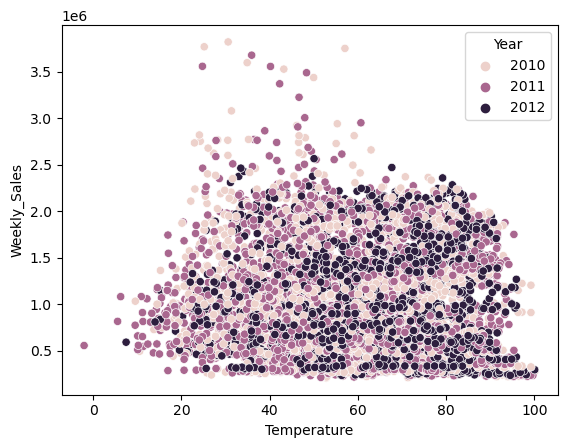

In [306]:
sns.scatterplot(data=df,x="Temperature",y="Weekly_Sales", hue="Year")
plt.show()

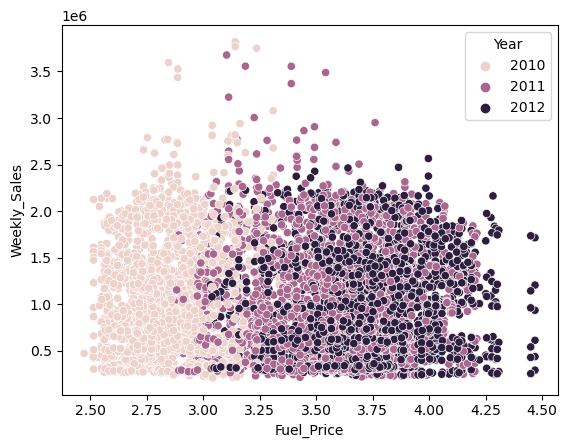

In [307]:
sns.scatterplot(data=df,x="Fuel_Price",y="Weekly_Sales",hue="Year")
plt.show()

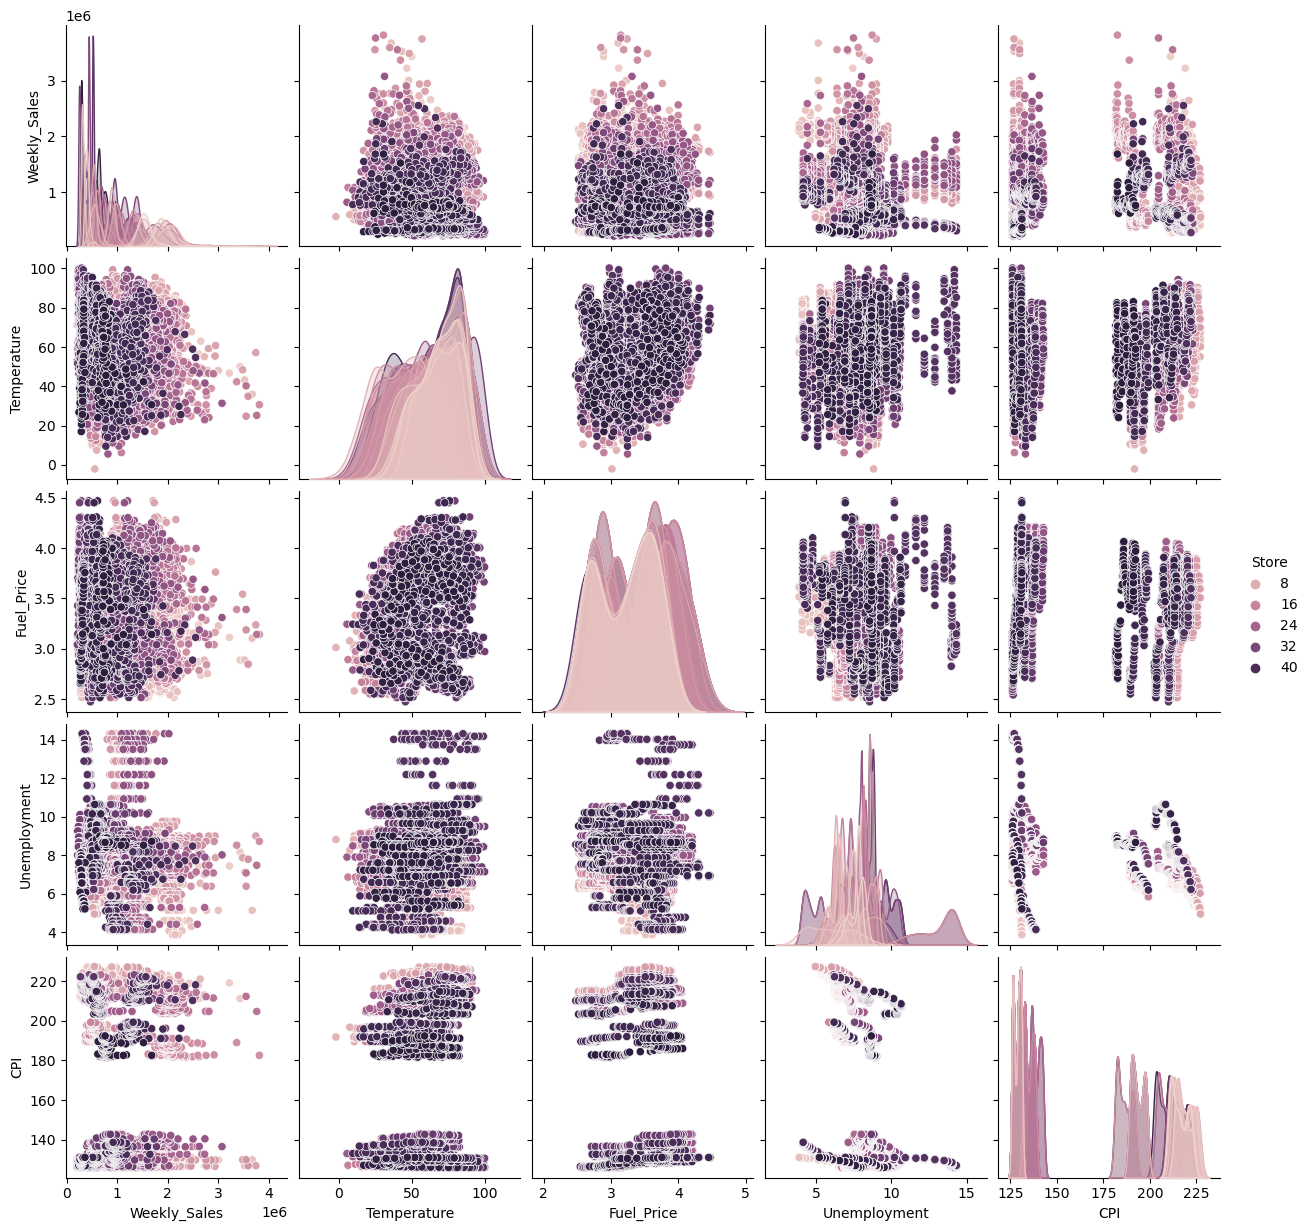

In [308]:
#Now if we want compare more than 2 features we use pair plots.It displays in matrix form
sns.pairplot(df,vars=["Weekly_Sales","Temperature","Fuel_Price","Unemployment","CPI"],hue="Store")
plt.show()

In [309]:
#Checking correlation on a subset of columns in the dataset.
df_corr=df[["Weekly_Sales","Temperature","Fuel_Price","Unemployment","CPI"]].corr()
df_corr

Weekly_Sales  Temperature  Fuel_Price  Unemployment       CPI
Weekly_Sales      1.000000    -0.063810    0.009464     -0.106176 -0.072634
Temperature      -0.063810     1.000000    0.144982      0.101158  0.176888
Fuel_Price        0.009464     0.144982    1.000000     -0.034684 -0.170642
Unemployment     -0.106176     0.101158   -0.034684      1.000000 -0.302020
CPI              -0.072634     0.176888   -0.170642     -0.302020  1.000000

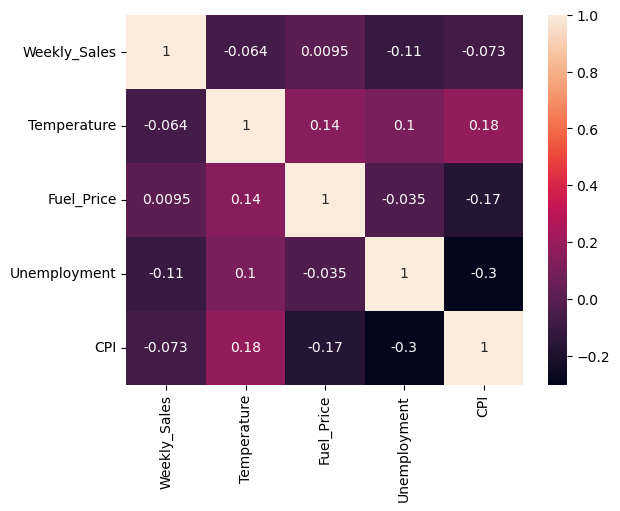

In [310]:
#Another way to look at correlation using seaborn heatmap
sns.heatmap(df_corr,annot=True)
plt.show()

**STEP 5 : Ask a question about the data**  
* Try to answer a question you have about the data using a plot or statistic

**a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?**

**Answer :** Yes, the weekly sales and the unemployment rate are inversely proportional.From the pair plots and the heat map mentioned above we can see that when the Unemployment is less than 9% ,weekly sales are approximately to the maximum. As the unemployment rate moves above 9%, weekly sales start dropping.

In [311]:
df.groupby("Store")[["Unemployment","Weekly_Sales"]].agg({"Unemployment":'mean',"Weekly_Sales":'sum'}).sort_values(by=['Unemployment'],ascending=False)

Unemployment  Weekly_Sales
Store                            
28        13.116483  1.892637e+08
38        13.116483  5.515963e+07
12        13.116483  1.442872e+08
43         9.934804  9.056544e+07
34         9.934804  1.382498e+08
29         9.806385  7.714155e+07
18         8.838301  1.551147e+08
35         8.788573  1.315207e+08
14         8.648748  2.889999e+08
45         8.648748  1.123953e+08
7          8.585734  8.159828e+07
32         8.585734  1.668192e+08
33         8.533154  3.716022e+07
24         8.447014  1.940160e+08
10         8.362965  2.716177e+08
42         8.362965  7.956575e+07
22         8.069371  1.470756e+08
27         8.001748  2.538559e+08
15         7.996252  8.913368e+07
19         7.996252  2.066349e+08
26         7.872070  1.434164e+08
36         7.869049  5.341221e+07
39         7.869049  2.074455e+08
37         7.869049  7.420274e+07
21         7.623846  1.081179e+08
2          7.623846  2.753824e+08
30         7.623846  6.271689e+07
31         7.623846  1.996139e+08
1          7.610420  2.224028e+08
25         7.371413  1.010612e+08
20         7.371413  3.013978e+08
11         7.176986  1.939628e+08
3          7.176986  5.758674e+07
13         7.001825  2.865177e+08
41         6.973378  1.813419e+08
44         6.735622  4.329309e+07
6          6.606902  2.237561e+08
17         6.549406  1.277821e+08
16         6.477993  7.425243e+07
5          6.295406  4.547569e+07
9          6.099881  7.778922e+07
8          6.091846  1.299512e+08
4          5.964692  2.995440e+08
40         4.796014  1.378703e+08
23         4.796014  1.987506e+08

**From the above data and the pair plots we can infer that stores: 28,28 and 12 are the top 3 stores which are suffering the most with Unemployment rate 13%**

**b. If the weekly sales show a seasonal trend, when and what could be the reason?**

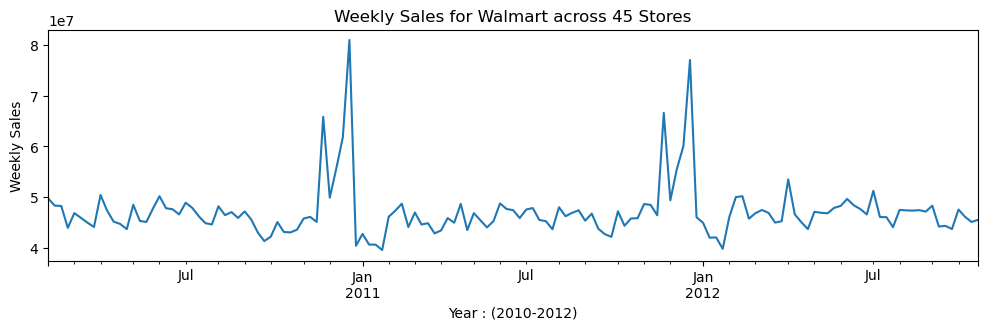

In [312]:
ax=df.groupby(df.index)["Weekly_Sales"].sum().plot(kind="line",title="Weekly Sales for Walmart across 45 Stores",figsize=(12,3))
ax.set_xlabel("Year : (2010-2012)")
ax.set_ylabel("Weekly Sales")
plt.show()

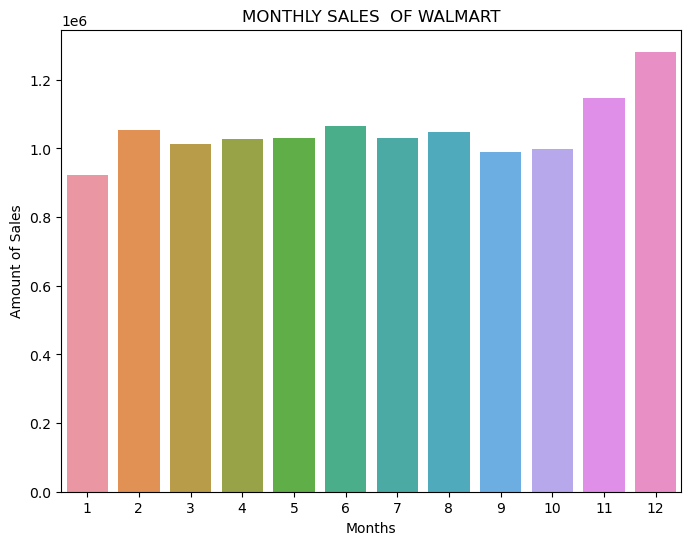

In [313]:
#Getting the mean monthly sales for walmart between Feb-2010 and Oct-2012
monthly_sales=df.groupby("Month")[["Weekly_Sales"]].mean().round(2)
plt.figure(figsize=(8,6))
sns.barplot(data=monthly_sales, x=monthly_sales.index,y=monthly_sales["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Amount of Sales")
plt.title("MONTHLY SALES  OF WALMART")
plt.show()

From the above plot we can infer that weekly sales show a seasonal trend(Exhibiting repeating patterns every year). Every year they peak in December. Since December is a holiday season and with xmas and New year sales are expected to spike.

**c. Does temperature affect the weekly sales in any manner?**

From the correlation data and the pair plots mentioned above we can infer that temperature and weekly_sales are neagatively correlated. The ideal temperature is between 20-60 for a good sale.

**d. How is the Consumer Price index affecting the weekly sales of various stores?**

From the correlation data and the pair plots mentioned above we can infer that not much of correlation between CPI and the weekly sales.

**e. Top performing stores according to the historical data.**

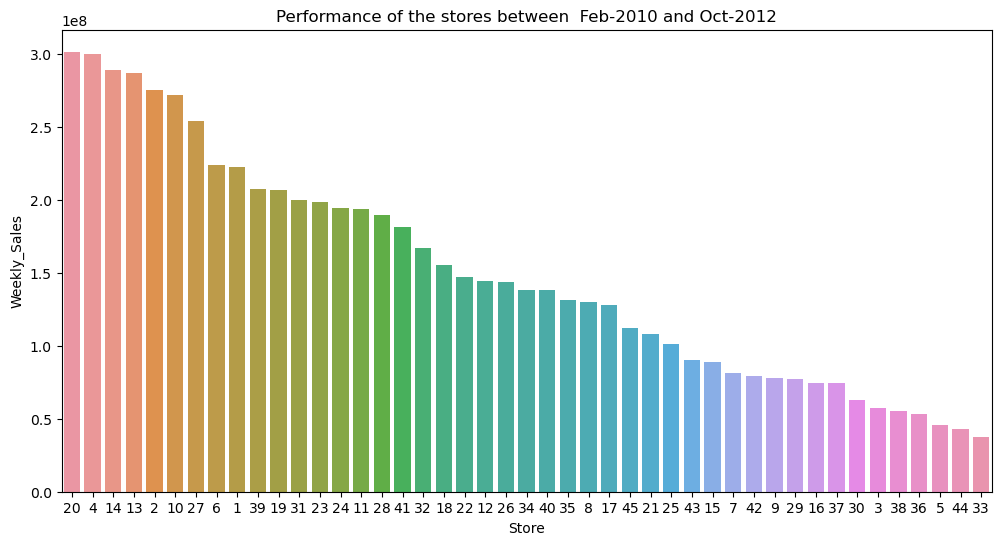

In [314]:
#Making the barplot and sorting the bars
plt.figure(figsize=(12,6))
store_sales=df.groupby("Store")[["Weekly_Sales"]].sum().sort_values(by=["Weekly_Sales"],ascending=False)
sns.barplot(data= store_sales,x=store_sales.index,y=store_sales.Weekly_Sales,order=store_sales.sort_values(by="Weekly_Sales",ascending=False).index)
plt.title("Performance of the stores between  Feb-2010 and Oct-2012")
plt.show()

According to the bar plot mentioned above we can infer the Top 3 performing stores as per the Weekly Sales  
* Store 20  
* Store 4
* Store 14

**f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.**

According to the bar plot mentioned above we can infer that the worst performing store as per the weekly sales is store : 33. There is 14%significant difference between the top and the worst performing store.

In [315]:
a=df[df["Store"]==20]["Weekly_Sales"].sum()

In [316]:
b=df[df["Store"]==33]["Weekly_Sales"].sum()

In [317]:
(b/(a-b))*100

14.063186355249957

**PREDECTIVE MODELLING FOR THE TOP PERFORMING STORE :20**

**Installation of prophet (Name changed from fbprophet to Prophet)**

**!pip install Prophet**

In [318]:
from prophet import Prophet


In [319]:
model=Prophet() #creating an object of the model.

In [320]:
df_20=df[df["Store"]==20]
df_20.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05     20    2401395.47             0        25.92       2.784   
2010-02-12     20    2109107.90             1        22.12       2.773   
2010-02-19     20    2161549.76             0        25.43       2.745   
2010-02-26     20    1898193.95             0        32.32       2.754   
2010-03-05     20    2119213.72             0        31.75       2.777   

                   CPI  Unemployment  Month  Year  
Date                                               
2010-02-05  204.247194         8.187      2  2010  
2010-02-12  204.385747         8.187      2  2010  
2010-02-19  204.432100         8.187      2  2010  
2010-02-26  204.463087         8.187      2  2010  
2010-03-05  204.494073         8.187      3  2010

In [321]:
df_20["ds"]=df_20.index

In [322]:
df_20.drop(columns=["Store","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment","Month","Year"],axis=1,inplace=True)

In [323]:
df_20.reset_index(drop=True,inplace=True)#Dropping the indexed column


In [324]:
df_20=df_20[["ds","Weekly_Sales"]].rename(columns={"Weekly_Sales":"y"})

In [325]:
df_20.head()

ds           y
0 2010-02-05  2401395.47
1 2010-02-12  2109107.90
2 2010-02-19  2161549.76
3 2010-02-26  1898193.95
4 2010-03-05  2119213.72

In [326]:
#Fitting the model
model.fit(df_20)

23:09:45 - cmdstanpy - INFO - Chain [1] start processing
23:09:45 - cmdstanpy - INFO - Chain [1] done processing


In [327]:
# Periods is given in months here(12 weeks = 3months) ,MS stands for Month Start
future_dates=model.make_future_dataframe(periods=12,freq="W-FRI") #The week day it should run is friday

In [328]:
future_dates.tail(20)

ds
135 2012-09-07
136 2012-09-14
137 2012-09-21
138 2012-09-28
139 2012-10-05
140 2012-10-12
141 2012-10-19
142 2012-10-26
143 2012-11-02
144 2012-11-09
145 2012-11-16
146 2012-11-23
147 2012-11-30
148 2012-12-07
149 2012-12-14
150 2012-12-21
151 2012-12-28
152 2013-01-04
153 2013-01-11
154 2013-01-18

In [329]:
#Maing predictions for the futire dates
forecast=model.predict(future_dates)

In [330]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

ds          yhat    yhat_lower    yhat_upper
150 2012-12-21  3.023629e+06  2.789211e+06  3.258826e+06
151 2012-12-28  2.690491e+06  2.456611e+06  2.915311e+06
152 2013-01-04  2.172592e+06  1.950095e+06  2.389717e+06
153 2013-01-11  1.786691e+06  1.562585e+06  2.021762e+06
154 2013-01-18  1.744309e+06  1.516469e+06  1.974066e+06

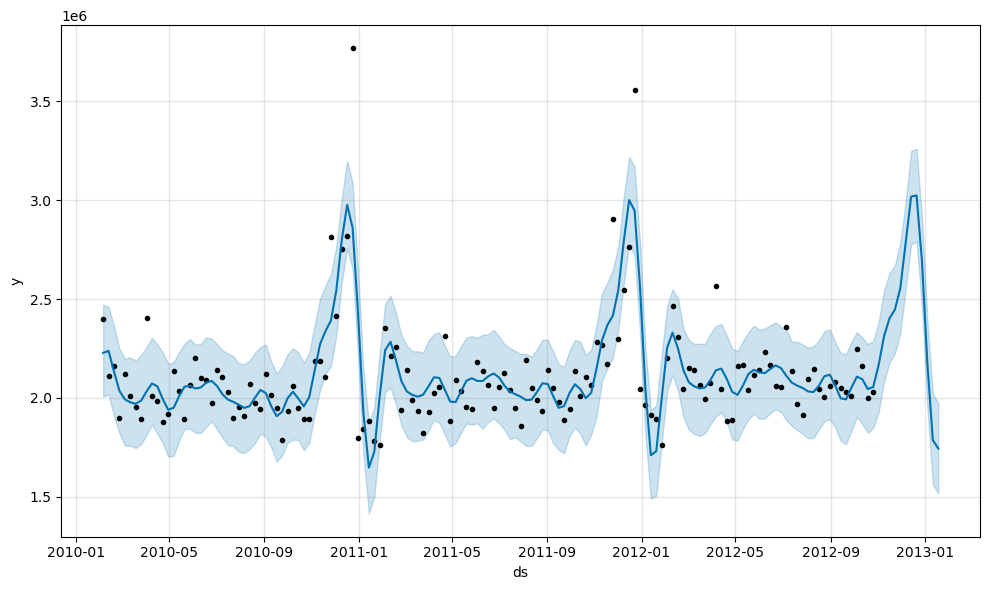

In [331]:
fig1=model.plot(forecast) #Assigning it to fig 1 otherwise 2 graphs are coming

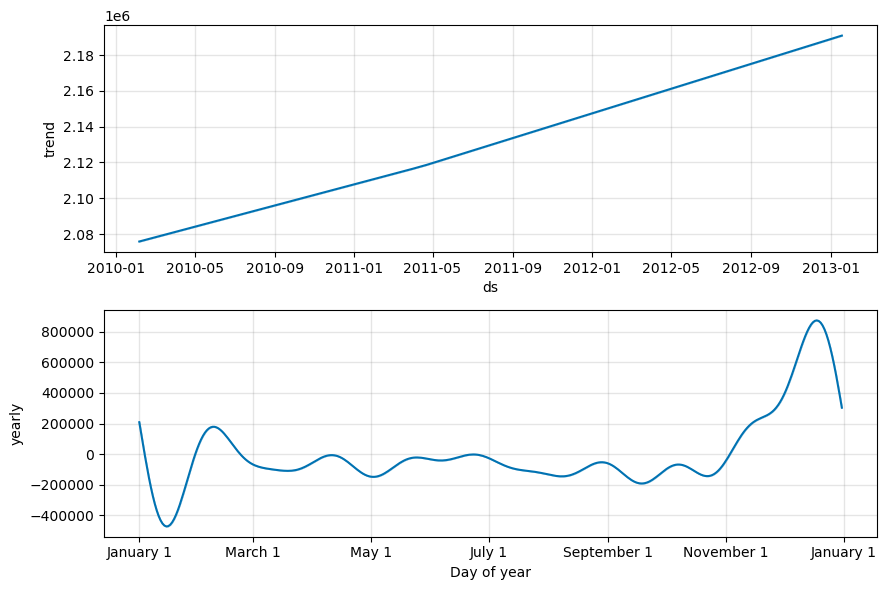

In [332]:
#f you want to see the forecast components, you can use the Prophet.plot_components method. 
#Visualize the components [Trends,yearly]
fig2=model.plot_components(forecast)

In [333]:
from prophet.diagnostics import cross_validation
df_20_cv = cross_validation(model,initial="730 days", period= "45 days", horizon="90 days")

  0%|          | 0/4 [00:00<?, ?it/s]

23:09:48 - cmdstanpy - INFO - Chain [1] start processing
23:09:48 - cmdstanpy - INFO - Chain [1] done processing
23:09:48 - cmdstanpy - INFO - Chain [1] start processing
23:09:48 - cmdstanpy - INFO - Chain [1] done processing
23:09:49 - cmdstanpy - INFO - Chain [1] start processing
23:09:49 - cmdstanpy - INFO - Chain [1] done processing
23:09:49 - cmdstanpy - INFO - Chain [1] start processing
23:09:49 - cmdstanpy - INFO - Chain [1] done processing


In [334]:
from prophet.diagnostics import performance_metrics
df_20_p=performance_metrics(df_20_cv)
df_20_p

horizon           mse           rmse            mae      mape     mdape  \
0   8 days  9.661866e+09   98294.791778   66872.093510  0.031420  0.015362   
1   9 days  1.179626e+10  108610.581149   82140.728246  0.038836  0.048186   
2  12 days  1.572135e+10  125384.821157  109914.914295  0.051646  0.052444   
3  13 days  1.260724e+10  112281.958133  100730.105401  0.047523  0.052444   
4  15 days  1.133512e+10  106466.509960   92915.002206  0.043848  0.052444   
5  16 days  1.229537e+10  110884.495508  105265.593316  0.049830  0.052444   
6  19 days  1.055283e+10  102726.954004   94543.795663  0.044682  0.033927   
7  20 days  6.644316e+09   81512.675672   68362.171198  0.032658  0.029812   
8  22 days  5.043591e+10  224579.417645  137118.629291  0.057217  0.029812   
9  23 days  6.592824e+10  256764.957308  181770.272777  0.075436  0.033927   
10 26 days  6.495556e+10  254863.816279  168091.968793  0.068780  0.026705   
11 27 days  6.712855e+10  259091.771674  180721.145277  0.075168  0.058645   
12 29 days  6.841622e+10  261564.949904  195036.286812  0.082166  0.058645   
13 30 days  2.160706e+10  146993.386979  112958.362159  0.051428  0.039486   
14 33 days  5.709391e+09   75560.511980   64419.106971  0.031204  0.037456   
15 34 days  6.706472e+09   81893.050837   78271.251835  0.037923  0.037456   
16 36 days  1.428094e+10  119502.873083  100227.132727  0.050327  0.037456   
17 37 days  1.483150e+10  121784.653934  103336.371215  0.052207  0.037456   
18 40 days  1.690775e+10  130029.806738  113248.228464  0.056321  0.048884   
19 41 days  1.660755e+10  128870.295807  108217.372493  0.054022  0.048884   
20 43 days  2.090350e+10  144580.432450  126630.635151  0.064422  0.058028   
21 44 days  1.522727e+10  123398.814188  111696.982727  0.056267  0.058028   
22 47 days  1.361942e+10  116702.262809   99467.425095  0.049738  0.058028   
23 48 days  1.128150e+10  106214.383880   87825.631158  0.045096  0.034818   
24 50 days  1.618387e+10  127215.843706  115876.144908  0.057998  0.072803   
25 51 days  1.168555e+10  108099.718910   95948.917894  0.046771  0.034818   
26 54 days  8.447009e+09   91907.610285   82292.684497  0.038988  0.034818   
27 55 days  9.217654e+09   96008.613038   89528.527744  0.042774  0.035168   
28 57 days  1.249586e+10  111784.870805  104576.385553  0.049328  0.040975   
29 58 days  1.114684e+10  105578.600467   99955.134528  0.047304  0.040975   
30 61 days  1.109251e+10  105320.969386   99516.632366  0.047204  0.040975   
31 62 days  9.673917e+09   98356.072990   83830.085228  0.039606  0.035168   
32 64 days  8.845452e+09   94050.264654   75717.390947  0.035591  0.029601   
33 65 days  4.550333e+09   67456.155888   46424.292644  0.022080  0.015093   
34 68 days  1.786155e+10  133647.118530   77722.623191  0.034217  0.015093   
35 69 days  2.316303e+10  152194.063922  100313.684555  0.043771  0.015093   
36 71 days  2.318393e+10  152262.704140  101484.215048  0.044295  0.015093   
37 72 days  2.538628e+10  159330.710742  117200.057142  0.052183  0.054533   
38 75 days  2.714117e+10  164745.765206  135918.465329  0.060951  0.054533   
39 76 days  1.206331e+10  109833.115990   96955.291060  0.045163  0.044421   
40 78 days  6.256632e+09   79098.874927   69056.160927  0.032890  0.043881   
41 79 days  7.411053e+09   86087.474241   82064.240410  0.039226  0.043881   
42 82 days  6.160161e+09   78486.690998   75298.479192  0.035987  0.038336   
43 83 days  4.568331e+09   67589.426645   62274.799981  0.030067  0.037282   
44 85 days  5.630813e+09   75038.741110   67178.292639  0.031989  0.037282   
45 86 days  5.397260e+09   73466.049470   60945.628813  0.029090  0.037282   
46 89 days  7.797404e+09   88302.909950   72335.070315  0.035636  0.038336   
47 90 days  6.710663e+09   81918.635316   60520.832523  0.029589  0.014281   

       smape  coverage  
0   0.032508       1.0  
1   0.039633       1.0  
2   0.052875       1.0  
3   0.048406       1.0  
4   0.044584       1.0  
5   0.050455       1.0  
6   0

**SARIMAX MODEL**

In [335]:
df_20=df
df_20.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  Month  Year  
Date                                               
2010-02-05  211.096358         8.106      2  2010  
2010-02-12  211.242170         8.106      2  2010  
2010-02-19  211.289143         8.106      2  2010  
2010-02-26  211.319643         8.106      2  2010  
2010-03-05  211.350143         8.106      3  2010

In [336]:
df_20=df[df["Store"]==20]
df_20.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05     20    2401395.47             0        25.92       2.784   
2010-02-12     20    2109107.90             1        22.12       2.773   
2010-02-19     20    2161549.76             0        25.43       2.745   
2010-02-26     20    1898193.95             0        32.32       2.754   
2010-03-05     20    2119213.72             0        31.75       2.777   

                   CPI  Unemployment  Month  Year  
Date                                               
2010-02-05  204.247194         8.187      2  2010  
2010-02-12  204.385747         8.187      2  2010  
2010-02-19  204.432100         8.187      2  2010  
2010-02-26  204.463087         8.187      2  2010  
2010-03-05  204.494073         8.187      3  2010

In [337]:
df_20.drop(columns=["Store","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment","Month","Year"],axis=1,inplace=True)

In [338]:
df_20.head()

Weekly_Sales
Date                    
2010-02-05    2401395.47
2010-02-12    2109107.90
2010-02-19    2161549.76
2010-02-26    1898193.95
2010-03-05    2119213.72

In [339]:
df_20.isna().sum()

Weekly_Sales    0
dtype: int64

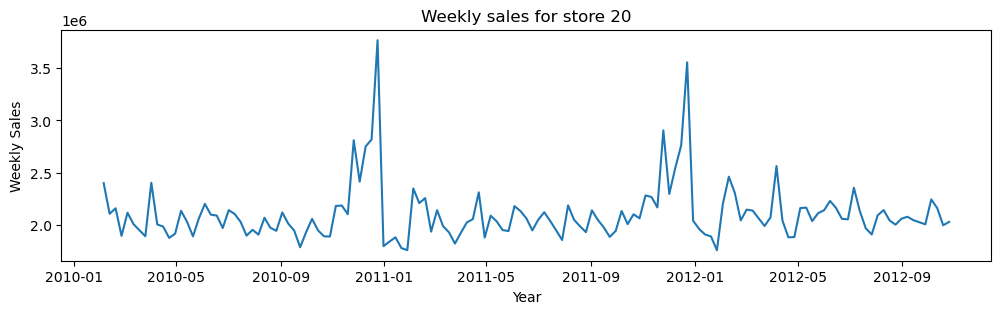

In [340]:
#PLOT THE WEKLY SALES FOR STORE : 20
plt.figure(figsize=(12,3))
plt.plot(df_20["Weekly_Sales"])
plt.xlabel("Year")
plt.ylabel("Weekly Sales")
plt.title(f"Weekly sales for store 20")
plt.show()

**Checking for stationarity in the data**

In [341]:

# Null Hypothesis: Data is not stationary
# Alternate Hypothesis:Data is stationary (This is the claim)
from statsmodels.tsa.stattools import adfuller
result=adfuller(df_20["Weekly_Sales"])
print(f'ADF Statistic:,{result[0]}') #some default value based upon the critial values
print(f'p-value:{result[1]}')

if(result[1]>0.05):
    print("The Data is Not Stationary")
else:
    print("The Data is Stationary")

ADF Statistic:,-5.393738692854832
p-value:3.4912952838128055e-06
The Data is Stationary


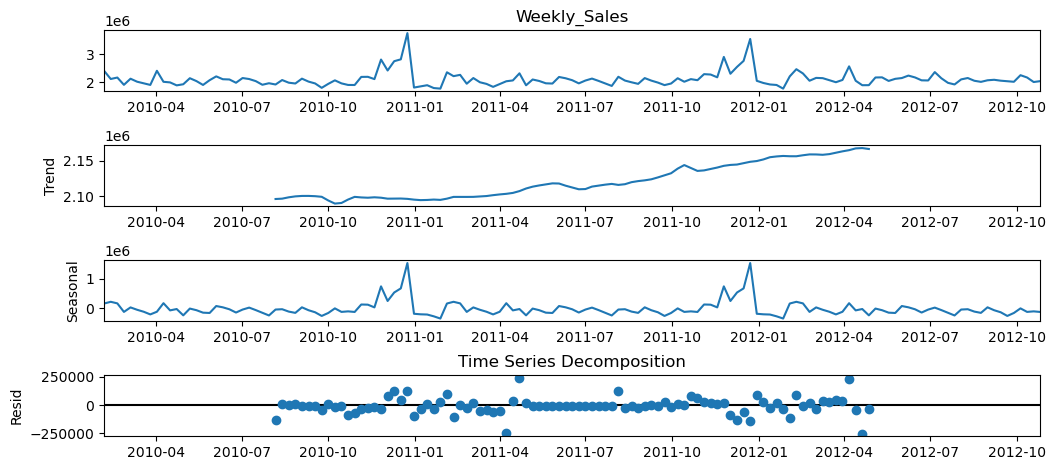

In [342]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df_20["Weekly_Sales"])
fig=decomposition.plot()
fig.set_figwidth(12)
plt.title("Time Series Decomposition")
plt.show()

**Building the model for Stationary data**

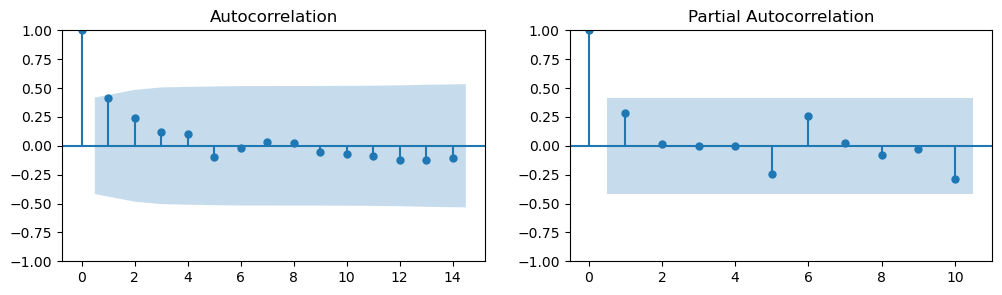

In [343]:
#Plotting the Autcorrelation plot and Partial Autocorrelation plot

from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

fig,ax=plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_figheight(3)
acf_plot=acf(df_20["Weekly_Sales"])
plot_acf(acf_plot,ax=ax[0])

pacf_plot=pacf(df_20["Weekly_Sales"])
plot_pacf(pacf_plot,ax=ax[1],lags=10)
plt.show()

In [344]:
train=df_20.iloc[:115]["Weekly_Sales"]
test=df_20.iloc[115:]["Weekly_Sales"]

In [345]:
print("Training Data", train.shape)
print("Testing Data",test.shape)

Training Data (115,)
Testing Data (28,)


In [346]:
#Itertools
# How to find the ideal values for p,d,q:

import itertools
from statsmodels.tsa.arima.model import ARIMA
p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination)) #total combinations of p,d,q

from sklearn.metrics import *
rmse = []
order1 = []
for pdq in pdq_combination:
    model = ARIMA(train,order=pdq)
    model_fit=model.fit()
    pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
    error = np.sqrt(mean_squared_error(test, pred)) #Computing the mean_squarred error
    order1.append(pdq)
    rmse.append(error)
        
results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE']) 
results.sort_values("RMSE",ascending=True) #Least RMSE score are best hyperparamterer for (p,d,q) values


128


RMSE
(1, 0, 3)  105142.034502
(0, 0, 3)  105144.977148
(0, 0, 1)  107444.097072
(0, 0, 2)  108051.052042
(2, 0, 3)  108184.698684
...                  ...
(0, 1, 1)  144217.379912
(6, 1, 2)  144600.076527
(5, 1, 3)  144757.528662
(5, 1, 1)  144928.003249
(7, 0, 4)  148524.836920

[128 rows x 1 columns]

In [347]:
#Running the ARIMA model

model = ARIMA(train,order=(1,0,3)) #(p,d,q)
model=model.fit()

<Axes: xlabel='Date'>

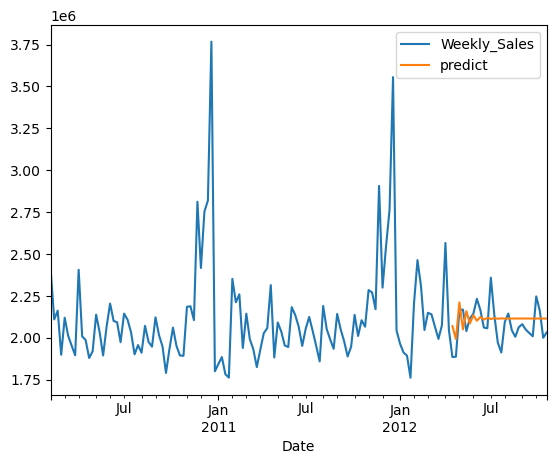

In [348]:
df_20['predict']=model.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
df_20[['Weekly_Sales','predict']].plot()

In [349]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [350]:
model=SARIMAX(train,order=(1,0,3),seasonal_order=(1,0,3,12))
model=model.fit()

<Axes: xlabel='Date'>

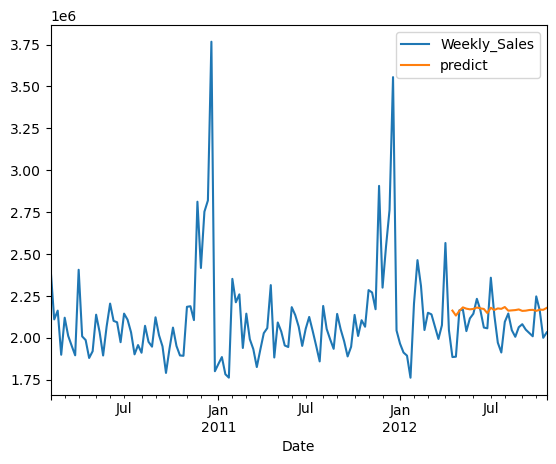

In [351]:
df_20['predict']=model.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
df_20[['Weekly_Sales','predict']].plot()

<Axes: xlabel='Date'>

<Figure size 1200x300 with 0 Axes>

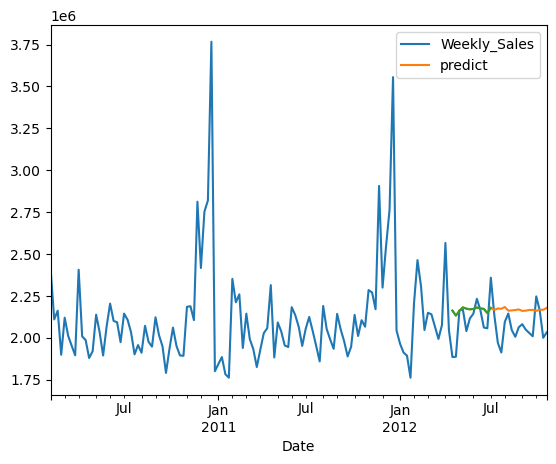

In [352]:
forecast = model.forecast(steps=12) #12 weeks
plt.figure(figsize=(12,3))
df_20.plot()
forecast.plot()

**Predictive modelling for STORE :4 ,Using Facebook Prophet**

In [353]:
from prophet import Prophet
model=Prophet()


In [354]:
df_4=df[df["Store"]==4]
df_4.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      4    2135143.87             0        43.76       2.598   
2010-02-12      4    2188307.39             1        28.84       2.573   
2010-02-19      4    2049860.26             0        36.45       2.540   
2010-02-26      4    1925728.84             0        41.36       2.590   
2010-03-05      4    1971057.44             0        43.49       2.654   

                   CPI  Unemployment  Month  Year  
Date                                               
2010-02-05  126.442065         8.623      2  2010  
2010-02-12  126.496258         8.623      2  2010  
2010-02-19  126.526286         8.623      2  2010  
2010-02-26  126.552286         8.623      2  2010  
2010-03-05  126.578286         8.623      3  2010

In [355]:
df_4["ds"]=df_4.index

In [356]:
df_4.drop(columns=["Store","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment","Month","Year"],axis=1,inplace=True)


In [357]:
df_4.reset_index(drop=True,inplace=True)#Dropping the indexed column

In [358]:
df_4=df_4[["ds","Weekly_Sales"]].rename(columns={"Weekly_Sales":"y"})

In [359]:
df_4.head()

ds           y
0 2010-02-05  2135143.87
1 2010-02-12  2188307.39
2 2010-02-19  2049860.26
3 2010-02-26  1925728.84
4 2010-03-05  1971057.44

In [360]:
#Fitting the model
model.fit(df_4)

23:11:09 - cmdstanpy - INFO - Chain [1] start processing
23:11:09 - cmdstanpy - INFO - Chain [1] done processing


In [361]:
# Periods is given in months here(12 weeks = 3months) ,MS stands for Month Start
future_dates=model.make_future_dataframe(periods=12,freq="W-FRI") #The week day it should run is friday

In [362]:
future_dates.tail(20)

ds
135 2012-09-07
136 2012-09-14
137 2012-09-21
138 2012-09-28
139 2012-10-05
140 2012-10-12
141 2012-10-19
142 2012-10-26
143 2012-11-02
144 2012-11-09
145 2012-11-16
146 2012-11-23
147 2012-11-30
148 2012-12-07
149 2012-12-14
150 2012-12-21
151 2012-12-28
152 2013-01-04
153 2013-01-11
154 2013-01-18

In [363]:
#Maing predictions for the futire dates
forecast=model.predict(future_dates)

In [364]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

ds          yhat    yhat_lower    yhat_upper
150 2012-12-21  3.056358e+06  2.860857e+06  3.269510e+06
151 2012-12-28  2.805659e+06  2.594446e+06  3.006441e+06
152 2013-01-04  2.363786e+06  2.160253e+06  2.572265e+06
153 2013-01-11  2.004469e+06  1.805808e+06  2.205065e+06
154 2013-01-18  1.936045e+06  1.732039e+06  2.146997e+06

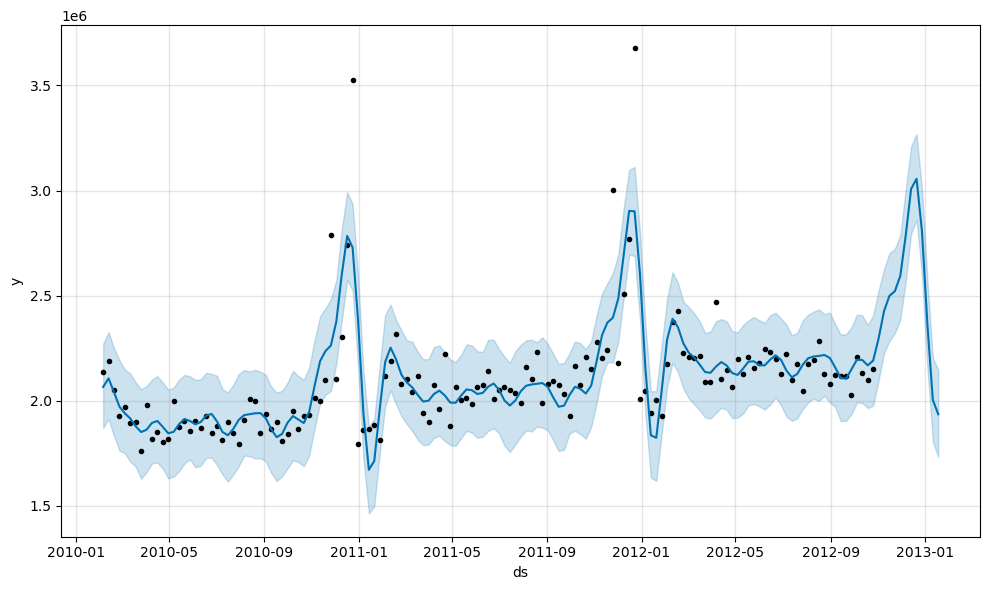

In [365]:
fig1=model.plot(forecast) #Assigning it to fig 1 otherwise 2 graphs are coming

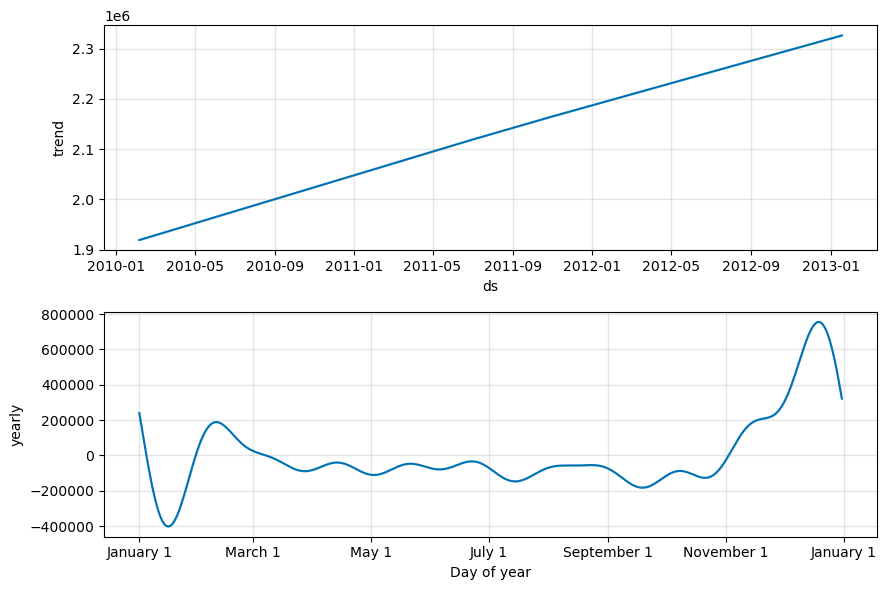

In [366]:
#f you want to see the forecast components, you can use the Prophet.plot_components method. 
#Visualize the components [Trends,yearly]
fig2=model.plot_components(forecast)

In [367]:
from prophet.diagnostics import cross_validation
df_4_cv = cross_validation(model,initial="730 days", period= "45 days", horizon="90 days")

  0%|          | 0/4 [00:00<?, ?it/s]

23:11:13 - cmdstanpy - INFO - Chain [1] start processing
23:11:13 - cmdstanpy - INFO - Chain [1] done processing
23:11:13 - cmdstanpy - INFO - Chain [1] start processing
23:11:13 - cmdstanpy - INFO - Chain [1] done processing
23:11:13 - cmdstanpy - INFO - Chain [1] start processing
23:11:14 - cmdstanpy - INFO - Chain [1] done processing
23:11:14 - cmdstanpy - INFO - Chain [1] start processing
23:11:14 - cmdstanpy - INFO - Chain [1] done processing


In [368]:
from prophet.diagnostics import performance_metrics
df_4_p=performance_metrics(df_4_cv)
df_4_p

horizon           mse           rmse            mae      mape     mdape  \
0   8 days  1.748052e+09   41809.709148   37618.457159  0.017344  0.018178   
1   9 days  2.071138e+09   45509.758659   42131.395613  0.019415  0.021425   
2  12 days  2.505185e+09   50051.827672   49383.936290  0.022877  0.022586   
3  13 days  1.882740e+09   43390.554919   42938.877070  0.019948  0.021425   
4  15 days  1.767916e+09   42046.594359   41320.889447  0.019322  0.021425   
5  16 days  2.782936e+09   52753.538337   48913.878162  0.022810  0.021425   
6  19 days  2.346607e+09   48441.791992   40676.203446  0.019059  0.015047   
7  20 days  2.228888e+09   47211.104529   39361.446133  0.018175  0.015047   
8  22 days  2.258939e+10  150297.656773   97062.923532  0.041205  0.018165   
9  23 days  2.332628e+10  152729.421996  104446.830188  0.044341  0.030730   
10 26 days  2.237965e+10  149598.300154   97543.567510  0.041040  0.023817   
11 27 days  2.621325e+10  161905.060795  124080.402241  0.053547  0.030730   
12 29 days  2.716042e+10  164804.179438  131854.657528  0.057548  0.038167   
13 30 days  6.771563e+09   82289.504341   73696.292857  0.034430  0.030730   
14 33 days  5.841448e+09   76429.368788   60968.530756  0.028717  0.023817   
15 34 days  1.156371e+10  107534.678567   86059.129239  0.040940  0.038167   
16 36 days  8.084348e+09   89913.005004   66843.516623  0.031863  0.019818   
17 37 days  6.832812e+09   82660.822378   53593.371021  0.025526  0.014232   
18 40 days  7.708034e+09   87795.409723   62133.495617  0.029146  0.019818   
19 41 days  8.977692e+09   94750.682845   77152.778637  0.036224  0.032331   
20 43 days  4.626995e+09   68022.021284   61284.479600  0.028677  0.032331   
21 44 days  9.772610e+09   98856.514304   85972.067540  0.040913  0.037559   
22 47 days  9.848579e+09   99240.007877   87962.952657  0.041770  0.037559   
23 48 days  8.898974e+09   94334.374136   78012.189708  0.037461  0.037559   
24 50 days  8.026211e+09   89589.120541   71008.368874  0.034027  0.020390   
25 51 days  7.034644e+09   83872.782925   64989.342085  0.030780  0.020390   
26 54 days  1.885555e+09   43422.977199   40260.783845  0.018429  0.019247   
27 55 days  1.782702e+09   42222.049985   37055.014092  0.017034  0.019247   
28 57 days  2.136655e+09   46223.965693   42060.977207  0.019376  0.020390   
29 58 days  2.183326e+09   46726.076301   42567.576890  0.019614  0.021579   
30 61 days  2.833735e+09   53232.835444   46748.916355  0.021713  0.021579   
31 62 days  7.091817e+09   84212.928074   68674.255270  0.032848  0.022498   
32 64 days  7.085211e+09   84173.695943   68189.646604  0.032599  0.022498   
33 65 days  6.938077e+09   83295.117953   66504.455698  0.031554  0.021579   
34 68 days  7.337550e+09   85659.501574   70057.683577  0.033090  0.029263   
35 69 days  5.959827e+09   77199.913690   58397.465156  0.027508  0.017272   
36 71 days  1.735048e+09   41653.906910   36857.111934  0.016629  0.017272   
37 72 days  5.502028e+09   74175.653174   63207.155974  0.029047  0.020526   
38 75 days  5.362108e+09   73226.416179   61170.513768  0.028379  0.020526   
39 76 days  7.114545e+09   84347.760324   70954.549074  0.033217  0.020526   
40 78 days  6.936108e+09   83283.299755   65341.416575  0.030679  0.020526   
41 79 days  1.312280e+10  114554.796534   92768.643809  0.044001  0.053453   
42 82 days  9.410564e+09   97008.062935   68791.256958  0.032681  0.013931   
43 83 days  1.207537e+10  109887.970042   86755.510568  0.041251  0.053453   
44 85 days  1.038285e+10  101896.279333   77423.878129  0.036560  0.030000   
45 86 days  1.200483e+10  109566.554161   95066.364638  0.044867  0.042386   
46 89 days  1.080384e+10  103941.533145   91588.406238  0.043446  0.042386   
47 90 days  1.191069e+10  109136.109077  103378.001071  0.048950  0.042386   

       smape  coverage  
0   0.017361       1.0  
1   0.019375       1.0  
2   0.022784       1.0  
3   0.019746       1.0  
4   0.019130       1.0  
5   0.022511       1.0  
6   0

**SARIMAX MODEL ON STORE :4**

In [369]:
df_4=df
df_4.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  Month  Year  
Date                                               
2010-02-05  211.096358         8.106      2  2010  
2010-02-12  211.242170         8.106      2  2010  
2010-02-19  211.289143         8.106      2  2010  
2010-02-26  211.319643         8.106      2  2010  
2010-03-05  211.350143         8.106      3  2010

In [370]:
df_4=df[df["Store"]==4]
df_4.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      4    2135143.87             0        43.76       2.598   
2010-02-12      4    2188307.39             1        28.84       2.573   
2010-02-19      4    2049860.26             0        36.45       2.540   
2010-02-26      4    1925728.84             0        41.36       2.590   
2010-03-05      4    1971057.44             0        43.49       2.654   

                   CPI  Unemployment  Month  Year  
Date                                               
2010-02-05  126.442065         8.623      2  2010  
2010-02-12  126.496258         8.623      2  2010  
2010-02-19  126.526286         8.623      2  2010  
2010-02-26  126.552286         8.623      2  2010  
2010-03-05  126.578286         8.623      3  2010

In [371]:
df_4.drop(columns=["Store","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment","Month","Year"],axis=1,inplace=True)

In [372]:
df_4.head()

Weekly_Sales
Date                    
2010-02-05    2135143.87
2010-02-12    2188307.39
2010-02-19    2049860.26
2010-02-26    1925728.84
2010-03-05    1971057.44

In [373]:
df_4.isna().sum()

Weekly_Sales    0
dtype: int64

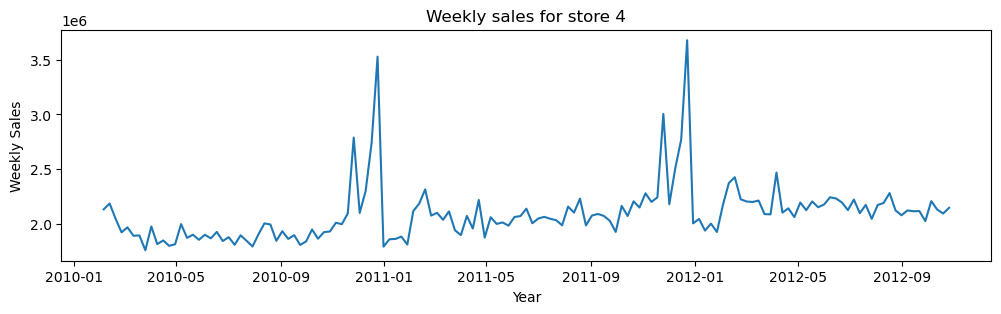

In [374]:
#PLOT THE WEKLY SALES FOR STORE : 4
plt.figure(figsize=(12,3))
plt.plot(df_4["Weekly_Sales"])
plt.xlabel("Year")
plt.ylabel("Weekly Sales")
plt.title(f"Weekly sales for store 4")
plt.show()

**Checking for stationarity in the data**

In [375]:
# Null Hypothesis: Data is not stationary
# Alternate Hypothesis:Data is stationary (This is the claim)
from statsmodels.tsa.stattools import adfuller
result=adfuller(df_4["Weekly_Sales"])
print(f'ADF Statistic:,{result[0]}') #some default value based upon the critial values
print(f'p-value:{result[1]}')

if(result[1]>0.05):
    print("The Data is Not Stationary")
else:
    print("The Data is Stationary")

ADF Statistic:,-2.8793819840147137
p-value:0.047798662236698174
The Data is Stationary


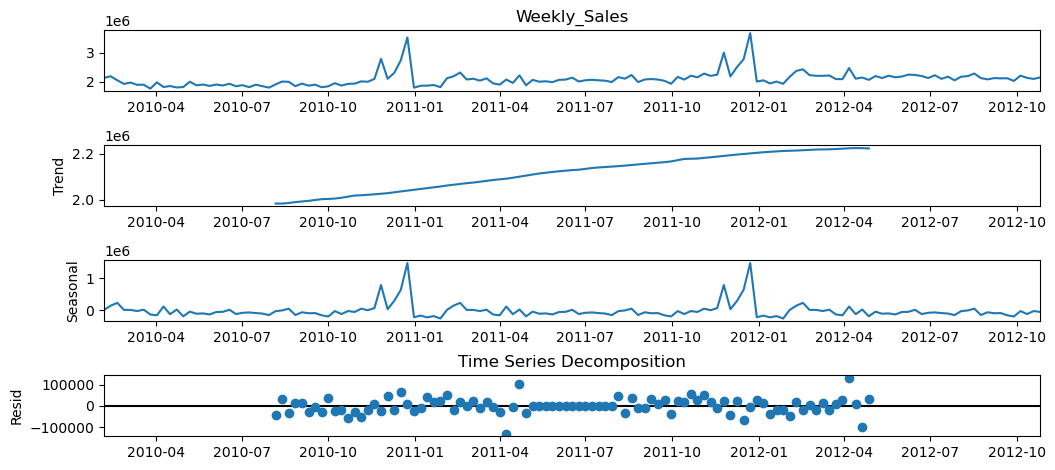

In [376]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df_4["Weekly_Sales"])
fig=decomposition.plot()
fig.set_figwidth(12)
plt.title("Time Series Decomposition")
plt.show()

**Building the model for Stationary data**

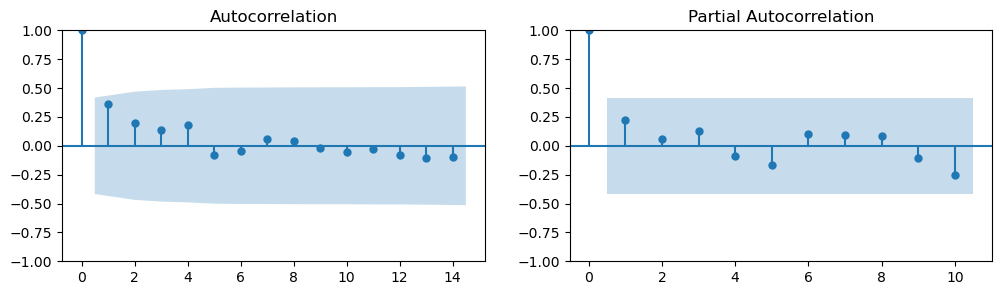

In [377]:
#Plotting the Autcorrelation plot and Partial Autocorrelation plot

from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

fig,ax=plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_figheight(3)
acf_plot=acf(df_4["Weekly_Sales"])
plot_acf(acf_plot,ax=ax[0])

pacf_plot=pacf(df_4["Weekly_Sales"])
plot_pacf(pacf_plot,ax=ax[1],lags=10)
plt.show()

In [378]:
train=df_4.iloc[:115]["Weekly_Sales"]
test=df_4.iloc[115:]["Weekly_Sales"]

In [379]:
print("Training Data", train.shape)
print("Testing Data",test.shape)

Training Data (115,)
Testing Data (28,)


In [380]:
#Itertools
# How to find the ideal values for p,d,q:

import itertools
from statsmodels.tsa.arima.model import ARIMA
p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination)) #total combinations of p,d,q

from sklearn.metrics import *
rmse = []
order1 = []
for pdq in pdq_combination:
    model = ARIMA(train,order=pdq)
    model_fit=model.fit()
    pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
    error = np.sqrt(mean_squared_error(test, pred)) #Computing the mean_squarred error
    order1.append(pdq)
    rmse.append(error)
        
results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE']) 
results.sort_values("RMSE",ascending=True) #Least RMSE score are best hyperparamterer for (p,d,q) values

128


RMSE
(5, 1, 0)   62349.220054
(3, 1, 1)   62435.656454
(3, 1, 2)   62483.983168
(4, 1, 1)   62541.647249
(4, 1, 0)   63000.486052
...                  ...
(7, 1, 4)   96516.899623
(6, 0, 4)   96862.500250
(7, 0, 4)  103260.689154
(4, 0, 7)  121240.185295
(0, 1, 5)  124992.528039

[128 rows x 1 columns]

In [381]:
#Running the ARIMA model

model = ARIMA(train,order=(5,1,0),enforce_stationarity=False) #(p,d,q)
model=model.fit()

<Axes: xlabel='Date'>

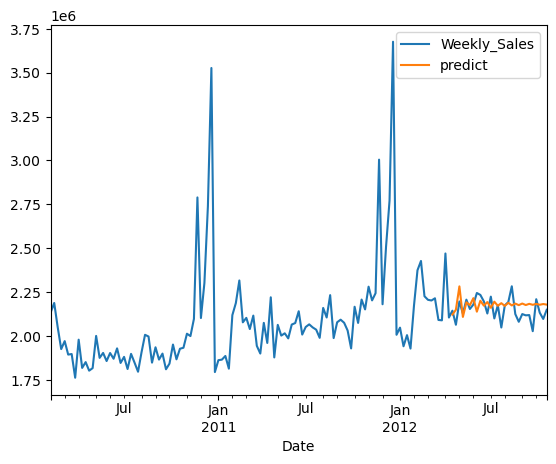

In [382]:
df_4['predict']=model.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
df_4[['Weekly_Sales','predict']].plot()

In [383]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(5,1,0),seasonal_order=(5,1,0,12))
model=model.fit()

<Axes: xlabel='Date'>

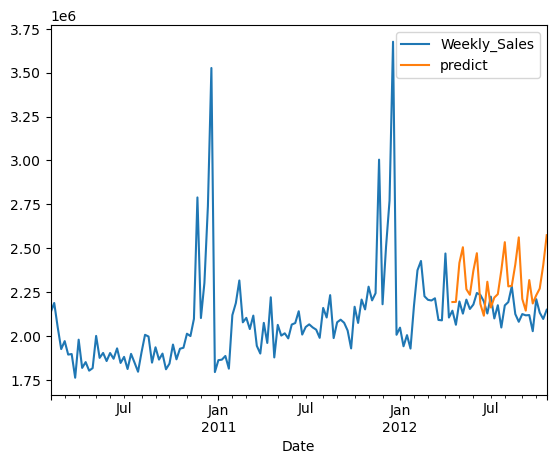

In [384]:
df_4['predict']=model.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
df_4[['Weekly_Sales','predict']].plot()

<Axes: xlabel='Date'>

<Figure size 1200x300 with 0 Axes>

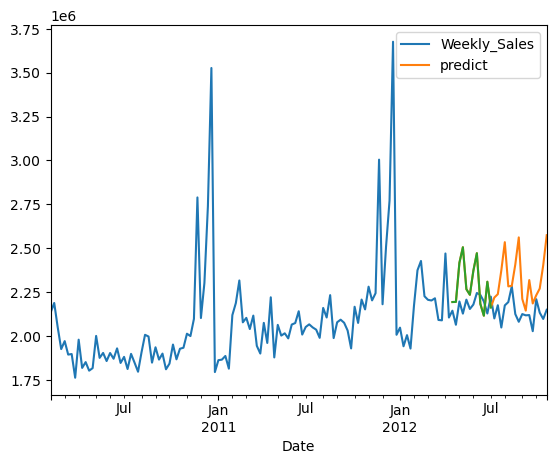

In [385]:
forecast = model.forecast(steps=12) #12 weeks
plt.figure(figsize=(12,3))
df_4.plot()
forecast.plot()

**PREDICTIVE MODELLING FOR WORST PERFORMING STORE :33**

In [386]:
from prophet import Prophet
model=Prophet() #creating an object of the model.

In [387]:
df_33=df[df["Store"]==33]
df_33.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05     33     274593.43             0        58.40       2.962   
2010-02-12     33     294882.83             1        55.47       2.828   
2010-02-19     33     296850.83             0        62.16       2.915   
2010-02-26     33     284052.77             0        56.50       2.825   
2010-03-05     33     291484.89             0        59.17       2.877   

                   CPI  Unemployment  Month  Year  
Date                                               
2010-02-05  126.442065        10.115      2  2010  
2010-02-12  126.496258        10.115      2  2010  
2010-02-19  126.526286        10.115      2  2010  
2010-02-26  126.552286        10.115      2  2010  
2010-03-05  126.578286        10.115      3  2010

In [388]:
df_33["ds"]=df_20.index
df_33.drop(columns=["Store","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment","Month","Year"],axis=1,inplace=True)

In [389]:
df_33.reset_index(drop=True,inplace=True)#Dropping the indexed column
df_33=df_33[["ds","Weekly_Sales"]].rename(columns={"Weekly_Sales":"y"})


In [390]:
df_33.head()

ds          y
0 2010-02-05  274593.43
1 2010-02-12  294882.83
2 2010-02-19  296850.83
3 2010-02-26  284052.77
4 2010-03-05  291484.89

In [391]:
#Fitting the model
model.fit(df_33)

23:12:42 - cmdstanpy - INFO - Chain [1] start processing
23:12:42 - cmdstanpy - INFO - Chain [1] done processing


In [392]:
# Periods is given in months here(12 weeks = 3months) ,MS stands for Month Start
future_dates=model.make_future_dataframe(periods=12,freq="W-FRI") #The week day it should run is friday

In [393]:
future_dates.tail(20)

ds
135 2012-09-07
136 2012-09-14
137 2012-09-21
138 2012-09-28
139 2012-10-05
140 2012-10-12
141 2012-10-19
142 2012-10-26
143 2012-11-02
144 2012-11-09
145 2012-11-16
146 2012-11-23
147 2012-11-30
148 2012-12-07
149 2012-12-14
150 2012-12-21
151 2012-12-28
152 2013-01-04
153 2013-01-11
154 2013-01-18

In [394]:
#Maing predictions for the futire dates
forecast=model.predict(future_dates)

In [395]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

ds           yhat     yhat_lower     yhat_upper
150 2012-12-21  265491.665435  241226.761223  289181.392692
151 2012-12-28  268368.277974  244334.180337  291453.908981
152 2013-01-04  268213.002526  244680.316393  293180.414588
153 2013-01-11  267547.190424  244219.055079  291205.895196
154 2013-01-18  268926.806522  243787.891161  291684.552913

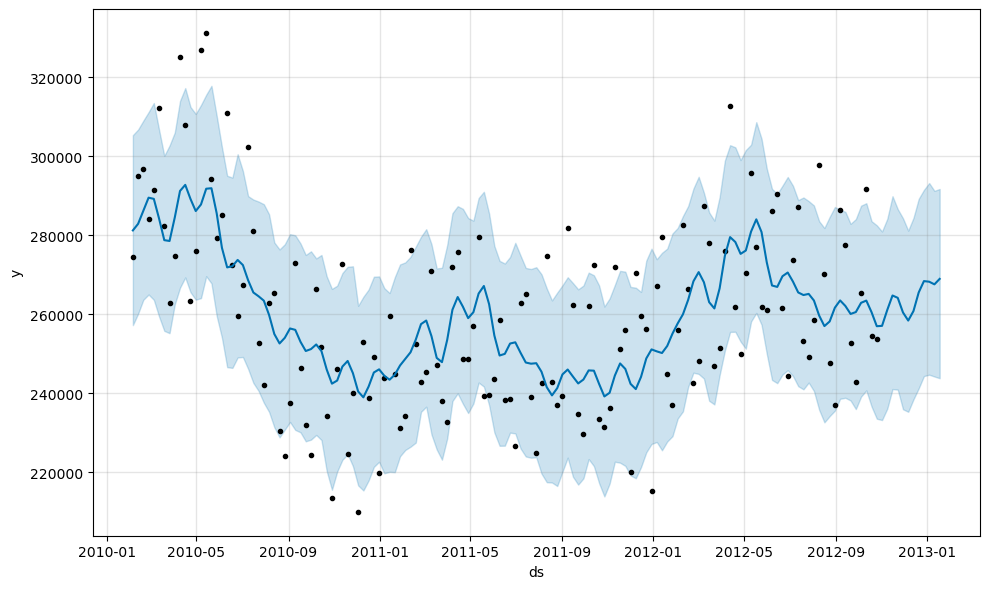

In [396]:
fig1=model.plot(forecast) #Assigning it to fig 1 otherwise 2 graphs are coming

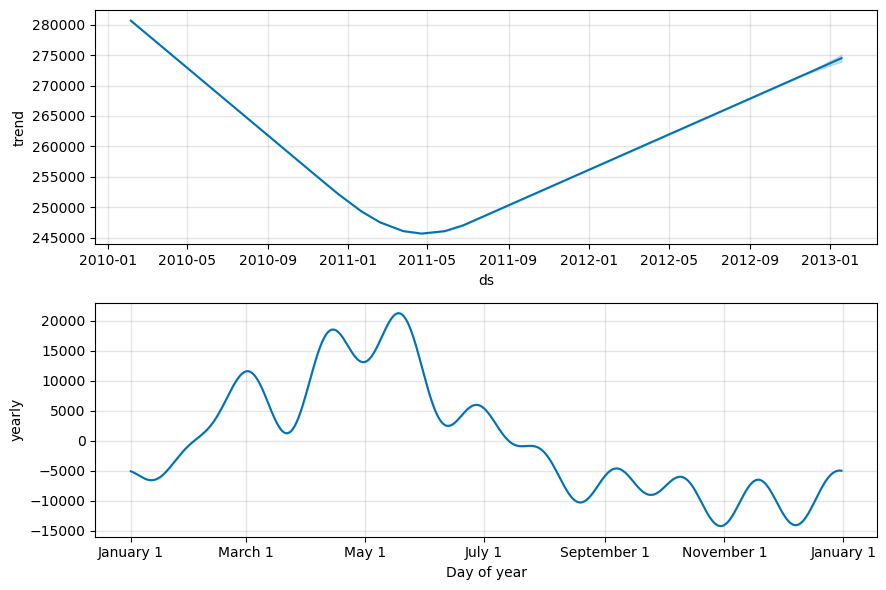

In [397]:
#f you want to see the forecast components, you can use the Prophet.plot_components method. 
#Visualize the components [Trends,yearly]
fig2=model.plot_components(forecast)

In [398]:
from prophet.diagnostics import cross_validation
df_33_cv = cross_validation(model,initial="730 days", period= "45 days", horizon="90 days")

  0%|          | 0/4 [00:00<?, ?it/s]

23:12:46 - cmdstanpy - INFO - Chain [1] start processing
23:12:46 - cmdstanpy - INFO - Chain [1] done processing
23:12:47 - cmdstanpy - INFO - Chain [1] start processing
23:12:47 - cmdstanpy - INFO - Chain [1] done processing
23:12:47 - cmdstanpy - INFO - Chain [1] start processing
23:12:47 - cmdstanpy - INFO - Chain [1] done processing
23:12:48 - cmdstanpy - INFO - Chain [1] start processing
23:12:48 - cmdstanpy - INFO - Chain [1] done processing


In [399]:
from prophet.diagnostics import performance_metrics
df_33_p=performance_metrics(df_33_cv)
df_33_p

horizon           mse          rmse           mae      mape     mdape  \
0   8 days  2.351765e+08  15335.464819  12812.575501  0.047056  0.051832   
1   9 days  1.995404e+08  14125.878519  11017.168935  0.040845  0.020773   
2  12 days  1.135318e+08  10655.129447   8961.488802  0.033569  0.020773   
3  13 days  5.903102e+08  24296.299286  18241.789917  0.064568  0.053341   
4  15 days  6.373282e+08  25245.360019  20458.236273  0.073499  0.064250   
5  16 days  6.966057e+08  26393.288488  21956.349380  0.079771  0.064250   
6  19 days  7.032780e+08  26519.389327  22455.506416  0.081345  0.064250   
7  20 days  7.384530e+08  27174.491964  23422.020356  0.085940  0.076317   
8  22 days  2.611370e+08  16159.734454  14018.321815  0.054457  0.064250   
9  23 days  2.201169e+08  14836.337202  12280.738863  0.047059  0.028644   
10 26 days  1.816249e+08  13476.826477  11375.762775  0.042314  0.028644   
11 27 days  1.780513e+08  13343.588345  11131.717102  0.042005  0.027256   
12 29 days  3.349760e+08  18302.350174  13964.735062  0.048986  0.027256   
13 30 days  4.343809e+08  20841.806920  18065.217323  0.063219  0.072577   
14 33 days  4.403558e+08  20984.656419  18422.829804  0.064850  0.072577   
15 34 days  4.610798e+08  21472.767677  18933.732313  0.068518  0.077943   
16 36 days  5.038908e+08  22447.512570  20810.773743  0.075394  0.077943   
17 37 days  2.852283e+08  16888.702219  16011.159839  0.061665  0.061475   
18 40 days  3.035475e+08  17422.615975  16403.387096  0.063088  0.061475   
19 41 days  4.391495e+08  20955.893226  20080.229218  0.075299  0.085057   
20 43 days  5.002921e+08  22367.211365  21320.021399  0.079340  0.085057   
21 44 days  4.813652e+08  21940.035687  20665.578047  0.077340  0.085057   
22 47 days  6.373678e+08  25246.143653  24496.950671  0.089440  0.096471   
23 48 days  6.092096e+08  24682.172373  23879.148502  0.087744  0.096471   
24 50 days  4.755925e+08  21808.083112  20306.671217  0.075673  0.076579   
25 51 days  3.219901e+08  17944.081214  15070.680587  0.054670  0.051475   
26 54 days  2.907011e+08  17049.958485  13072.105126  0.046539  0.036118   
27 55 days  1.125797e+08  10610.359506   7558.741670  0.027800  0.010821   
28 57 days  4.673575e+07   6836.355199   5519.890968  0.019955  0.010821   
29 58 days  4.562881e+08  21360.900257  12824.908651  0.043827  0.010821   
30 61 days  5.652754e+08  23775.520217  17188.744511  0.061758  0.037352   
31 62 days  6.040045e+08  24576.503851  19462.628000  0.071291  0.058484   
32 64 days  6.197167e+08  24894.108928  20823.565167  0.076042  0.058484   
33 65 days  6.758420e+08  25996.961690  22627.170451  0.083431  0.074300   
34 68 days  2.554229e+08  15981.954377  14650.599960  0.057021  0.058484   
35 69 days  1.546701e+08  12436.643771  11292.725755  0.042848  0.033134   
36 71 days  1.875301e+08  13694.163123  12278.596272  0.045762  0.033134   
37 72 days  1.783373e+08  13354.298183  11679.974568  0.044127  0.024959   
38 75 days  1.958336e+08  13994.056562  12094.491014  0.044695  0.024959   
39 76 days  4.294387e+08  20722.902378  17766.634306  0.063844  0.073057   
40 78 days  4.447592e+08  21089.313737  18638.387638  0.067265  0.073057   
41 79 days  4.662295e+08  21592.347974  19163.515335  0.071003  0.077137   
42 82 days  4.772942e+08  21847.064814  19861.462520  0.073650  0.077137   
43 83 days  3.799159e+08  19491.431441  15797.920881  0.059656  0.041996   
44 85 days  2.245741e+08  14985.794980  13002.373690  0.050359  0.041996   
45 86 days  3.369214e+08  18355.419031  16032.098145  0.060194  0.072689   
46 89 days  2.687381e+08  16393.232697  13982.224033  0.051082  0.046186   
47 90 days  2.521148e+08  15878.122507  12693.570222  0.045988  0.046186   

       smape  coverage  
0   0.047797       0.8  
1   0.041267       0.8  
2   0.033440       1.0  
3   0.067385       0.8  
4   0.075878       0.8  
5   0.081673       0.6  
6   0.083209       0.6  
7   0.088117       0.6  
8   0.053702       0.8  
9   0.046778       0.8  
10 

**SARIMAX MODEL**

In [400]:
df_33=df
df_33.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  Month  Year  
Date                                               
2010-02-05  211.096358         8.106      2  2010  
2010-02-12  211.242170         8.106      2  2010  
2010-02-19  211.289143         8.106      2  2010  
2010-02-26  211.319643         8.106      2  2010  
2010-03-05  211.350143         8.106      3  2010

In [401]:
df_33=df[df["Store"]==33]
df_33.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05     33     274593.43             0        58.40       2.962   
2010-02-12     33     294882.83             1        55.47       2.828   
2010-02-19     33     296850.83             0        62.16       2.915   
2010-02-26     33     284052.77             0        56.50       2.825   
2010-03-05     33     291484.89             0        59.17       2.877   

                   CPI  Unemployment  Month  Year  
Date                                               
2010-02-05  126.442065        10.115      2  2010  
2010-02-12  126.496258        10.115      2  2010  
2010-02-19  126.526286        10.115      2  2010  
2010-02-26  126.552286        10.115      2  2010  
2010-03-05  126.578286        10.115      3  2010

In [402]:
df_33.drop(columns=["Store","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment","Month","Year"],axis=1,inplace=True)

In [403]:
df_33.head()

Weekly_Sales
Date                    
2010-02-05     274593.43
2010-02-12     294882.83
2010-02-19     296850.83
2010-02-26     284052.77
2010-03-05     291484.89

In [404]:
df_33.isna().sum()

Weekly_Sales    0
dtype: int64

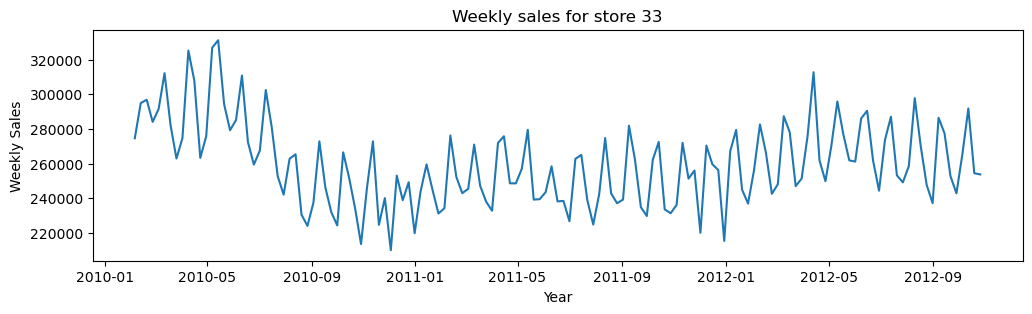

In [405]:
#PLOT THE WEKLY SALES FOR STORE : 20
plt.figure(figsize=(12,3))
plt.plot(df_33["Weekly_Sales"])
plt.xlabel("Year")
plt.ylabel("Weekly Sales")
plt.title(f"Weekly sales for store 33")
plt.show()

**Checking for stationarity in the data**

In [406]:

# Null Hypothesis: Data is not stationary
# Alternate Hypothesis:Data is stationary (This is the claim)
from statsmodels.tsa.stattools import adfuller
result=adfuller(df_33["Weekly_Sales"])
print(f'ADF Statistic:,{result[0]}') #some default value based upon the critial values
print(f'p-value:{result[1]}')

if(result[1]>0.05):
    print("The Data is Not Stationary")
else:
    print("The Data is Stationary")

ADF Statistic:,-4.13787332553231
p-value:0.0008379552269735437
The Data is Stationary


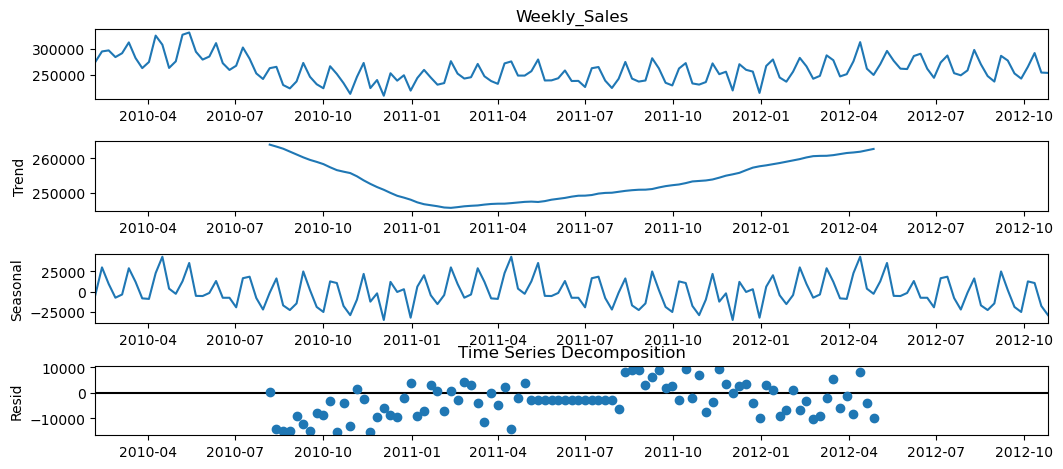

In [407]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df_33["Weekly_Sales"])
fig=decomposition.plot()
fig.set_figwidth(12)
plt.title("Time Series Decomposition")
plt.show()

**Building the model for Stationary data**

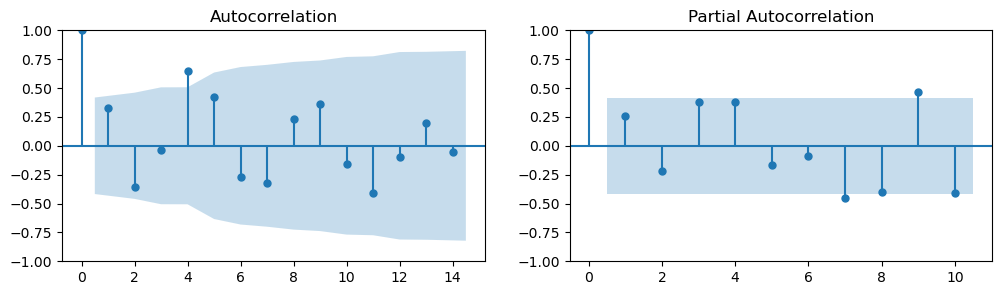

In [408]:
#Plotting the Autcorrelation plot and Partial Autocorrelation plot

from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

fig,ax=plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_figheight(3)
acf_plot=acf(df_33["Weekly_Sales"])
plot_acf(acf_plot,ax=ax[0])

pacf_plot=pacf(df_33["Weekly_Sales"])
plot_pacf(pacf_plot,ax=ax[1],lags=10)
plt.show()

In [409]:
train=df_33.iloc[:115]["Weekly_Sales"]
test=df_33.iloc[115:]["Weekly_Sales"]

In [410]:
print("Training Data", train.shape)
print("Testing Data",test.shape)

Training Data (115,)
Testing Data (28,)


In [411]:
#Itertools
# How to find the ideal values for p,d,q:

import itertools
from statsmodels.tsa.arima.model import ARIMA
p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination)) #total combinations of p,d,q

from sklearn.metrics import *
rmse = []
order1 = []
for pdq in pdq_combination:
    model = ARIMA(train,order=pdq)
    model_fit=model.fit()
    pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
    error = np.sqrt(mean_squared_error(test, pred)) #Computing the mean_squarred error
    order1.append(pdq)
    rmse.append(error)
        
results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE']) 
results.sort_values("RMSE",ascending=True) #Least RMSE score are best hyperparamterer for (p,d,q) values

128


RMSE
(5, 0, 5)   5388.015747
(7, 0, 6)   5859.074319
(5, 0, 4)   6055.654258
(7, 0, 5)   6240.209111
(6, 0, 5)   6480.528299
...                 ...
(5, 1, 1)  40772.082459
(5, 1, 0)  42462.950159
(0, 1, 1)  46775.127451
(1, 1, 0)  48143.097096
(0, 1, 0)  49370.823305

[128 rows x 1 columns]

In [412]:
#Running the ARIMA model

model = ARIMA(train,order=(5,0,5)) #(p,d,q)
model=model.fit()

<Axes: xlabel='Date'>

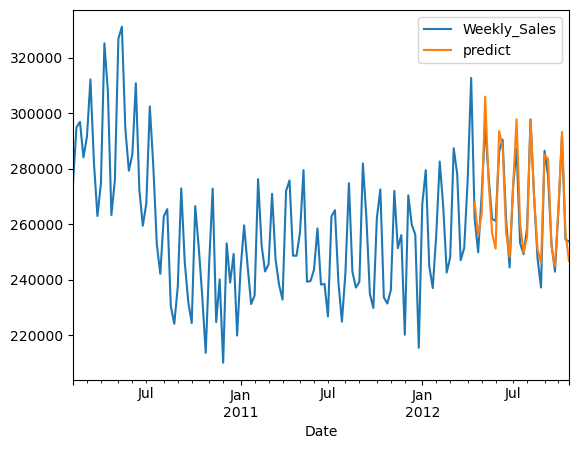

In [413]:
df_33['predict']=model.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
df_33[['Weekly_Sales','predict']].plot()

In [414]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(5,0,5),seasonal_order=(5,0,5,12))
model=model.fit()

<Axes: xlabel='Date'>

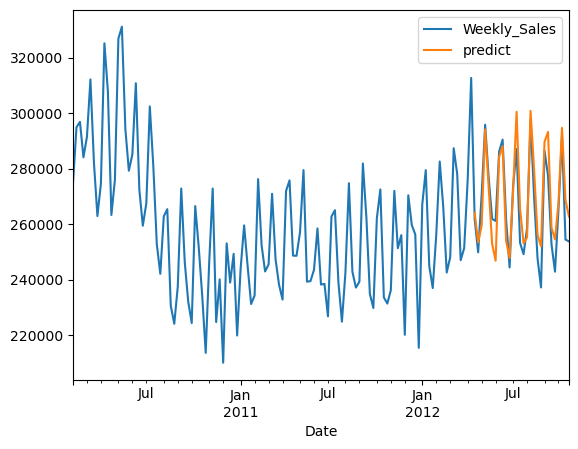

In [415]:
df_33['predict']=model.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
df_33[['Weekly_Sales','predict']].plot()

<Axes: xlabel='Date'>

<Figure size 1200x300 with 0 Axes>

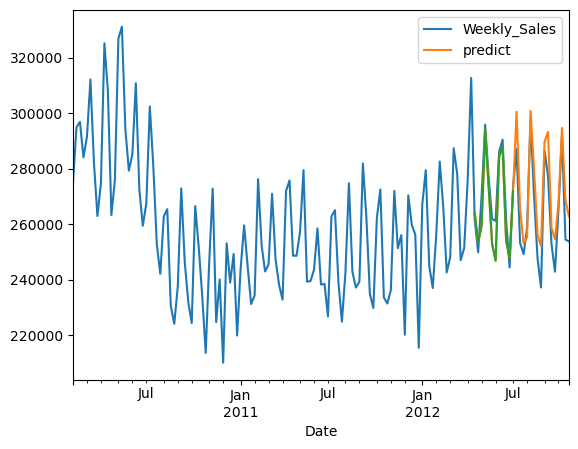

In [416]:
forecast = model.forecast(steps=12) #12 weeks
plt.figure(figsize=(12,3))
df_33.plot()
forecast.plot()

**PREDECTIVE MODELLING FOR THE SECOND WORST PERFORMING STORE :44**

In [417]:
from prophet import Prophet
model=Prophet() #creating an object of the model.

In [418]:
df_44=df[df["Store"]==44]
df_44.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05     44     281090.95             0        31.53       2.666   
2010-02-12     44     286857.13             1        33.16       2.671   
2010-02-19     44     267956.30             0        35.70       2.654   
2010-02-26     44     273079.07             0        29.98       2.667   
2010-03-05     44     284617.27             0        40.65       2.681   

                   CPI  Unemployment  Month  Year  
Date                                               
2010-02-05  126.442065         8.119      2  2010  
2010-02-12  126.496258         8.119      2  2010  
2010-02-19  126.526286         8.119      2  2010  
2010-02-26  126.552286         8.119      2  2010  
2010-03-05  126.578286         8.119      3  2010

In [419]:
df_44["ds"]=df_44.index
df_44.drop(columns=["Store","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment","Month","Year"],axis=1,inplace=True)

In [420]:
df_44.reset_index(drop=True,inplace=True)#Dropping the indexed column

In [421]:
df_44=df_44[["ds","Weekly_Sales"]].rename(columns={"Weekly_Sales":"y"})

In [422]:
df_44.head()

ds          y
0 2010-02-05  281090.95
1 2010-02-12  286857.13
2 2010-02-19  267956.30
3 2010-02-26  273079.07
4 2010-03-05  284617.27

In [423]:
#Fitting the model
model.fit(df_44)

23:15:07 - cmdstanpy - INFO - Chain [1] start processing


23:15:07 - cmdstanpy - INFO - Chain [1] done processing


In [424]:
# Periods is given in months here(12 weeks = 3months) ,MS stands for Month Start
future_dates=model.make_future_dataframe(periods=12,freq="W-FRI") #The week day it should run is friday

In [425]:
future_dates.tail(20)

ds
135 2012-09-07
136 2012-09-14
137 2012-09-21
138 2012-09-28
139 2012-10-05
140 2012-10-12
141 2012-10-19
142 2012-10-26
143 2012-11-02
144 2012-11-09
145 2012-11-16
146 2012-11-23
147 2012-11-30
148 2012-12-07
149 2012-12-14
150 2012-12-21
151 2012-12-28
152 2013-01-04
153 2013-01-11
154 2013-01-18

In [426]:
#Maing predictions for the futire dates
forecast=model.predict(future_dates)

In [427]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

ds           yhat     yhat_lower     yhat_upper
150 2012-12-21  362498.095331  346109.633798  378191.297653
151 2012-12-28  358550.901890  341308.246430  373967.240044
152 2013-01-04  347387.871739  330790.181933  364178.186256
153 2013-01-11  339843.725430  323068.701995  356033.363493
154 2013-01-18  342163.549645  325431.468611  358044.672550

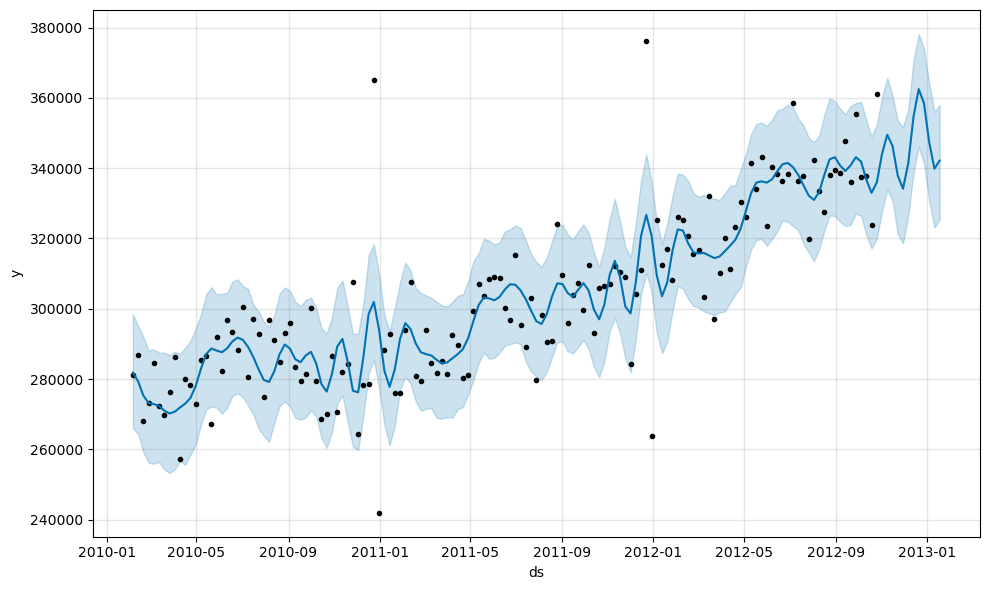

In [428]:
fig1=model.plot(forecast) #Assigning it to fig 1 otherwise 2 graphs are coming

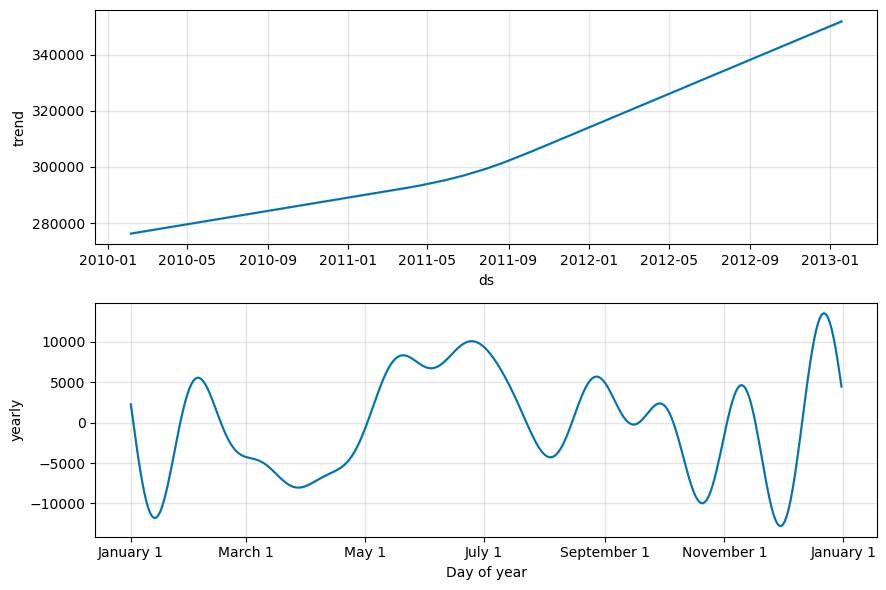

In [429]:
#f you want to see the forecast components, you can use the Prophet.plot_components method. 
#Visualize the components [Trends,yearly]
fig2=model.plot_components(forecast)

In [430]:
from prophet.diagnostics import cross_validation
df_44_cv = cross_validation(model,initial="730 days", period= "45 days", horizon="90 days")

  0%|          | 0/4 [00:00<?, ?it/s]

23:15:12 - cmdstanpy - INFO - Chain [1] start processing
23:15:13 - cmdstanpy - INFO - Chain [1] done processing
23:15:13 - cmdstanpy - INFO - Chain [1] start processing
23:15:14 - cmdstanpy - INFO - Chain [1] done processing
23:15:14 - cmdstanpy - INFO - Chain [1] start processing
23:15:14 - cmdstanpy - INFO - Chain [1] done processing
23:15:15 - cmdstanpy - INFO - Chain [1] start processing
23:15:15 - cmdstanpy - INFO - Chain [1] done processing


In [431]:
from prophet.diagnostics import performance_metrics
df_44_p=performance_metrics(df_44_cv)
df_44_p

horizon           mse          rmse           mae      mape     mdape  \
0   8 days  1.851245e+08  13606.046570  10673.875135  0.032775  0.042047   
1   9 days  8.178579e+07   9043.549531   6550.342259  0.020336  0.006618   
2  12 days  1.176928e+08  10848.629586   9173.433766  0.028019  0.039259   
3  13 days  1.191022e+08  10913.396571   9426.084643  0.028746  0.039259   
4  15 days  7.066275e+07   8406.113999   6522.079656  0.020330  0.010255   
5  16 days  4.021380e+07   6341.435478   4406.894048  0.013050  0.006607   
6  19 days  4.186573e+07   6470.373354   4689.081947  0.013903  0.010255   
7  20 days  2.746896e+07   5241.083827   4083.584607  0.012389  0.010255   
8  22 days  3.724920e+07   6103.212290   4956.364869  0.015203  0.010874   
9  23 days  1.548968e+08  12445.755972   9595.876549  0.028052  0.024326   
10 26 days  1.824700e+08  13508.144372  11593.111378  0.033854  0.031689   
11 27 days  1.867268e+08  13664.799846  12040.990334  0.035154  0.031689   
12 29 days  1.652076e+08  12853.309784  10004.682564  0.028940  0.024326   
13 30 days  1.556053e+08  12474.187089   9157.443285  0.026184  0.017373   
14 33 days  5.462543e+07   7390.902014   6140.446071  0.018324  0.017373   
15 34 days  2.957493e+07   5438.283473   4567.742113  0.013768  0.011878   
16 36 days  5.358015e+07   7319.846506   5879.369484  0.017985  0.011878   
17 37 days  6.105162e+07   7813.553807   7063.771952  0.021481  0.018102   
18 40 days  6.431143e+07   8019.440502   7429.064424  0.022531  0.018102   
19 41 days  4.750859e+07   6892.647327   5730.683691  0.017260  0.015798   
20 43 days  1.055459e+08  10273.551759   8425.328461  0.025483  0.018102   
21 44 days  9.270643e+07   9628.417634   7839.935779  0.023734  0.018102   
22 47 days  8.577780e+07   9261.630622   6948.666658  0.021094  0.015798   
23 48 days  1.185951e+08  10890.137116   8651.973164  0.025925  0.029710   
24 50 days  1.309429e+08  11443.027459  10089.539214  0.030350  0.029710   
25 51 days  1.136670e+08  10661.473719   9555.349187  0.028417  0.029710   
26 54 days  9.562148e+07   9778.623466   7711.305932  0.022643  0.024194   
27 55 days  9.516483e+07   9755.246419   7516.416407  0.022070  0.024194   
28 57 days  1.178727e+08  10856.921640   8239.613823  0.024337  0.024194   
29 58 days  1.086056e+08  10421.402487   7459.250308  0.021888  0.011951   
30 61 days  6.755297e+07   8219.061111   5261.835949  0.015497  0.011370   
31 62 days  1.163589e+08  10786.978117   8330.073519  0.024123  0.011951   
32 64 days  1.265816e+08  11250.847363   9629.616275  0.028016  0.021500   
33 65 days  7.984394e+07   8935.543832   7834.894450  0.022972  0.021500   
34 68 days  2.097165e+08  14481.591263  12196.053539  0.034973  0.026067   
35 69 days  2.082072e+08  14429.386350  11965.329816  0.034296  0.026067   
36 71 days  2.104164e+08  14505.736334  12035.246397  0.034808  0.026067   
37 72 days  2.032014e+08  14254.873401  11386.412384  0.032838  0.026067   
38 75 days  1.932591e+08  13901.765109  10641.232144  0.030483  0.014290   
39 76 days  6.268119e+07   7917.145605   6186.072877  0.018174  0.011651   
40 78 days  6.525877e+07   8078.289764   6544.949446  0.019353  0.013878   
41 79 days  1.581668e+07   3977.019533   3913.976456  0.011707  0.011651   
42 82 days  2.416896e+07   4916.193410   4639.917758  0.013857  0.013878   
43 83 days  2.332931e+07   4830.042921   4548.232354  0.013686  0.013435   
44 85 days  4.123752e+07   6421.644285   5863.873170  0.017537  0.013878   
45 86 days  3.765476e+07   6136.347699   5264.972078  0.015644  0.013435   
46 89 days  4.793394e+07   6923.434107   6241.890304  0.018800  0.022401   
47 90 days  2.391312e+08  15463.867069  11094.707146  0.031952  0.024084   

       smape  coverage  
0   0.033309       0.8  
1   0.020376       1.0  
2   0.028215       1.0  
3   0.028949       1.0  
4   0.020319       1.0  
5   0.013215       1.0  
6   0.014085       1.0  
7   0.012315       1.0  
8   0.015178       1.0  
9   0.028503       0.8  
10 

**SARIMAX MODEL**

In [432]:
df_44=df
df_44.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  Month  Year  
Date                                               
2010-02-05  211.096358         8.106      2  2010  
2010-02-12  211.242170         8.106      2  2010  
2010-02-19  211.289143         8.106      2  2010  
2010-02-26  211.319643         8.106      2  2010  
2010-03-05  211.350143         8.106      3  2010

In [433]:
df_44=df[df["Store"]==44]
df_44.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05     44     281090.95             0        31.53       2.666   
2010-02-12     44     286857.13             1        33.16       2.671   
2010-02-19     44     267956.30             0        35.70       2.654   
2010-02-26     44     273079.07             0        29.98       2.667   
2010-03-05     44     284617.27             0        40.65       2.681   

                   CPI  Unemployment  Month  Year  
Date                                               
2010-02-05  126.442065         8.119      2  2010  
2010-02-12  126.496258         8.119      2  2010  
2010-02-19  126.526286         8.119      2  2010  
2010-02-26  126.552286         8.119      2  2010  
2010-03-05  126.578286         8.119      3  2010

In [434]:
df_44.drop(columns=["Store","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment","Month","Year"],axis=1,inplace=True)

In [435]:
df_44.head()

Weekly_Sales
Date                    
2010-02-05     281090.95
2010-02-12     286857.13
2010-02-19     267956.30
2010-02-26     273079.07
2010-03-05     284617.27

In [436]:
df_44.isna().sum()

Weekly_Sales    0
dtype: int64

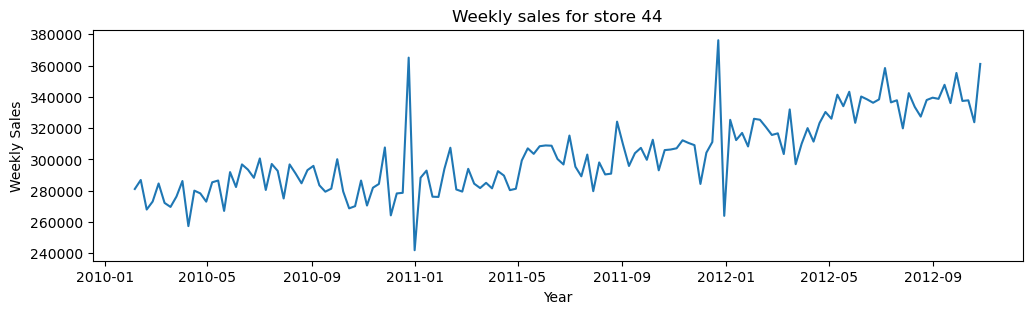

In [437]:
#PLOT THE WEKLY SALES FOR STORE : 20
plt.figure(figsize=(12,3))
plt.plot(df_44["Weekly_Sales"])
plt.xlabel("Year")
plt.ylabel("Weekly Sales")
plt.title(f"Weekly sales for store 44")
plt.show()

**Checking for stationarity in the data**

In [438]:
# Null Hypothesis: Data is not stationary
# Alternate Hypothesis:Data is stationary (This is the claim)
from statsmodels.tsa.stattools import adfuller
result=adfuller(df_44["Weekly_Sales"])
print(f'ADF Statistic:,{result[0]}') #some default value based upon the critial values
print(f'p-value:{result[1]}')

if(result[1]>0.05):
    print("The Data is Not Stationary")
else:
    print("The Data is Stationary")

ADF Statistic:,-0.9837026947465891
p-value:0.7591618635707305
The Data is Not Stationary


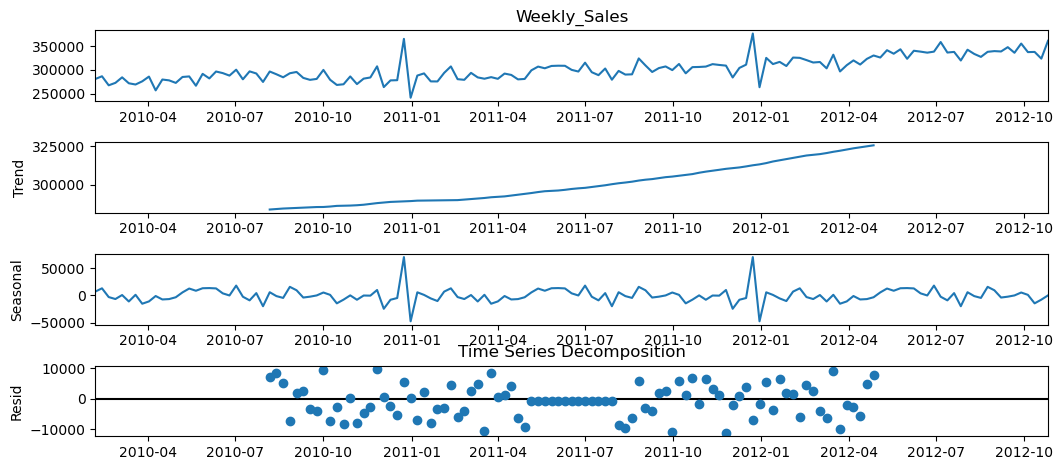

In [439]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df_44["Weekly_Sales"])
fig=decomposition.plot()
fig.set_figwidth(12)
plt.title("Time Series Decomposition")
plt.show()

**ROLLING STATS**

In [440]:
mean_log=df_44.rolling(window=12).mean()
std_log=df_44.rolling(window=12).std()

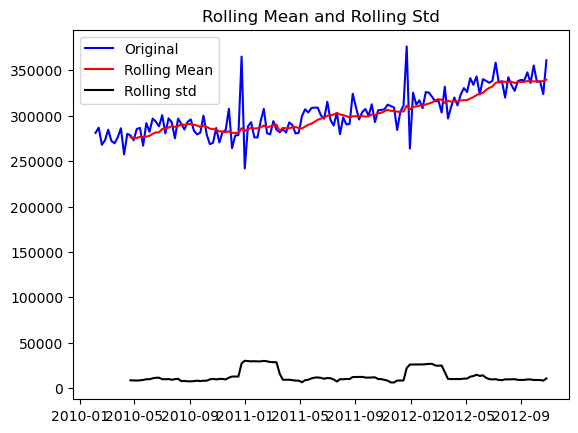

In [441]:
#Lets plot the rolling mean and rolling std
plt.plot(df_44,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')

plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [442]:
#Transformations
first_log=np.log(df_44)

In [443]:
first_log = first_log.dropna()

In [444]:
#Lets plot again
#Rolling stats
mean_log=first_log.rolling(window=12).mean()
std_log=first_log.rolling(window=12).std()

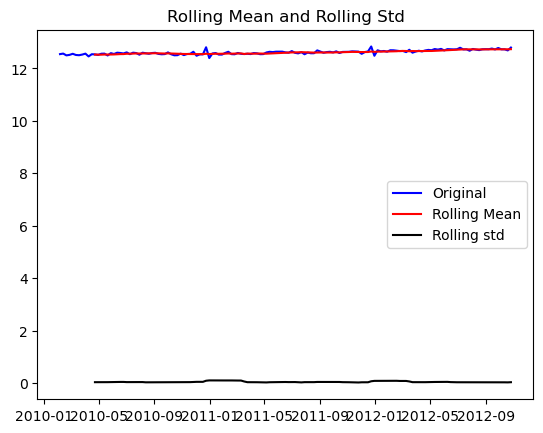

In [445]:
#Lets plot the rolling mean and rolling std
plt.plot(first_log,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')

plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [446]:
new_data = first_log - mean_log
new_data = new_data.dropna()
new_data.head()

Weekly_Sales
Date                    
2010-04-23      0.008227
2010-04-30     -0.008529
2010-05-07      0.036259
2010-05-14      0.034652
2010-05-21     -0.033793

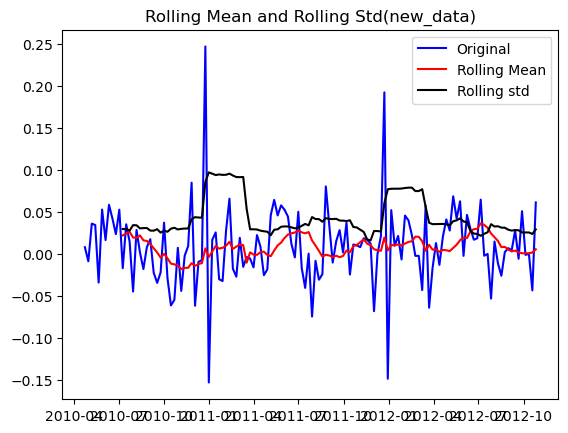

In [447]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std(new_data)')
plt.show()

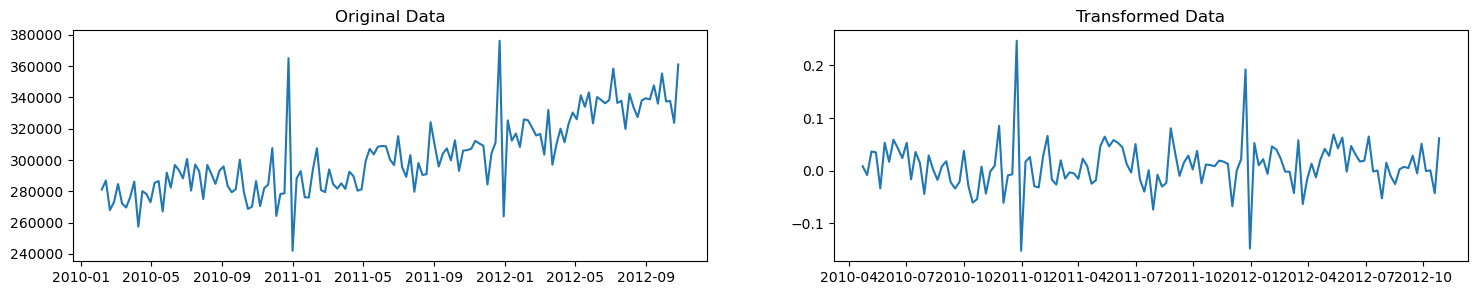

In [448]:
plt.figure(figsize=(18,3))
plt.subplot(1,2,1)
plt.plot(df_44["Weekly_Sales"])
plt.title("Original Data")

plt.subplot(1,2,2)
plt.plot(new_data["Weekly_Sales"])
plt.title("Transformed Data")

plt.show()


In [449]:
from statsmodels.tsa.stattools import adfuller

#ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(new_data)

print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

if(result[1]>0.05):
    print("The Data is not Stationary")
else:
    print("The Data is Stationary")

ADF Statistic,-4.4212656412210185
p-value=0.0002721397555320914
n_lags,3
The Data is Stationary


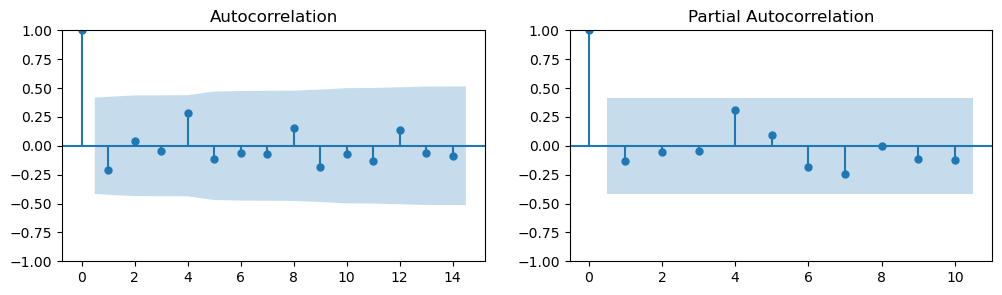

In [450]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_figheight(3)
acf_plot=acf(new_data["Weekly_Sales"].dropna()) #Gradual decrease and previuous point to that - 1
plot_acf(acf_plot,ax=ax[0])
pacf_plot=pacf(new_data["Weekly_Sales"].dropna()) #th data point or lag where there is a sudden shut-off - 2
plot_pacf(pacf_plot, lags=10,ax=ax[1])
plt.show()

In [451]:
train=new_data.iloc[:110]["Weekly_Sales"]
test=new_data.iloc[110:]["Weekly_Sales"]

In [452]:
print("Training Set:",train.shape)
print("Testing Set:",test.shape)

Training Set: (110,)
Testing Set: (22,)


In [453]:
#Itertools
# How to find the ideal values for p,d,q:

import itertools
from statsmodels.tsa.arima.model import ARIMA
p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination)) #total combinations of p,d,q

from sklearn.metrics import *
rmse = []
order1 = []
for pdq in pdq_combination:
    model = ARIMA(train,order=pdq)
    model_fit=model.fit()
    pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
    error = np.sqrt(mean_squared_error(test, pred)) #Computing the mean_squarred error
    order1.append(pdq)
    rmse.append(error)
        
results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE']) 
results.sort_values("RMSE",ascending=True) #Least RMSE score are best hyperparamterer for (p,d,q) values

128


RMSE
(3, 1, 4)  0.024621
(3, 1, 5)  0.024860
(7, 0, 5)  0.025110
(6, 1, 6)  0.025129
(5, 1, 6)  0.025453
...             ...
(4, 1, 0)  0.051444
(3, 1, 0)  0.052212
(1, 1, 0)  0.054110
(2, 1, 0)  0.055167
(0, 1, 0)  0.061034

[128 rows x 1 columns]

In [454]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train,order=(3,1,4)) #(p,d,q)
model_fit=model.fit()

<Axes: xlabel='Date'>

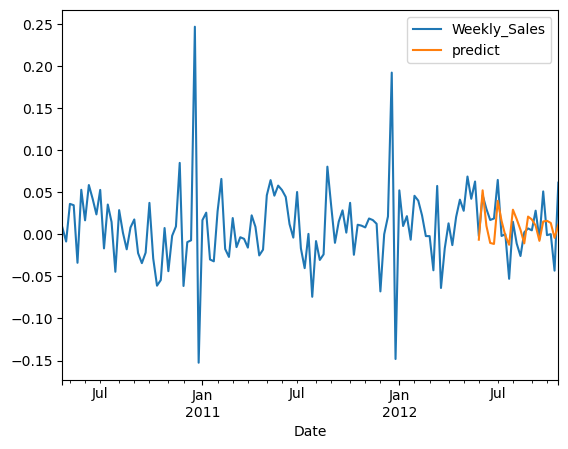

In [455]:
new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
new_data[['Weekly_Sales','predict']].plot()

In [456]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(3,1,4),seasonal_order=(3,1,4,12))
model=model.fit()

<Axes: xlabel='Date'>

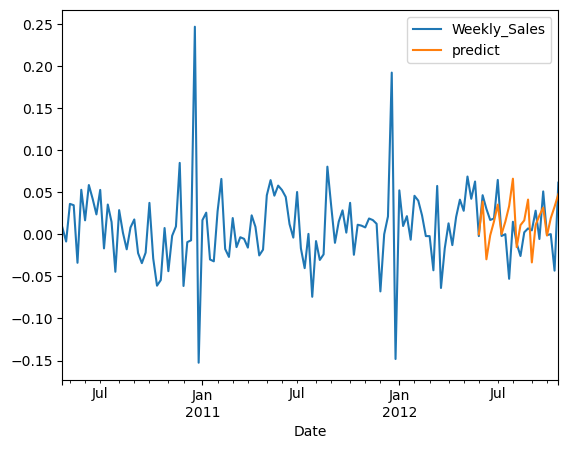

In [457]:
new_data['predict']=model.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
new_data[['Weekly_Sales','predict']].plot()

<Axes: xlabel='Date'>

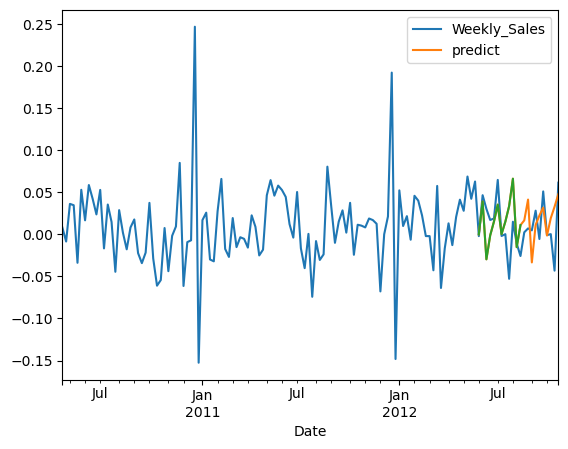

In [458]:
forecast = model.forecast(steps=12) #12 weeks
new_data.plot()
forecast.plot()